# Exploratory Data Analysis on The Lion King (2019) Movie Reviews


## Importing Necessary Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import random
import string
random.seed(123)
import datetime as dt

# import warnings
# warnings.filterwarnings('ignore','RuntimeWarning')

import nltk
import re
from nltk.corpus import stopwords
from nltk.classify.scikitlearn import SklearnClassifier
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.collocations import BigramCollocationFinder, TrigramCollocationFinder
from wordcloud import WordCloud

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# To maintain the same standard in all the plots
label_font = {'fontname':'sans serif','fontsize':15} 
title_font = {'fontname':'sans serif','fontsize':20}

## alreviews_df_3000 is extracted from a json file which is extracted from below link using request sessions.
https://www.rottentomatoes.com/m/the_lion_king_2019/reviews?type=user

## Users favourite genre is extracted from user account links present in json file using web scrapping.

#### From account links we got the following information.
- Movies that the user has rated.
- Number of movies the user has rated.
- Top 3 Genre's of the movies he rated

In [2]:
data1 = pd.read_csv('alreviews_df_3000.csv')
users_fav_genres = pd.read_csv('users_df_3000_fav_genres.csv')

In [3]:
print(data1.shape)
print(users_fav_genres.shape)

(3000, 13)
(3000, 11)


In [4]:
data1.dtypes

createDate           object
displayImageUrl      object
displayName          object
hasProfanity           bool
hasSpoilers            bool
isSuperReviewer        bool
isVerified             bool
rating               object
review               object
score               float64
timeFromCreation     object
updateDate           object
primary_key           int64
dtype: object

In [5]:
users_fav_genres.dtypes

accountLink               object
displayName               object
realm                     object
userId                    object
primary_key                int64
user_rated_movie_links    object
number_of_movies_rated     int64
movies                    object
fav_genre1                object
fav_genre2                object
fav_genre3                object
dtype: object

### Merging users_fav_genres with data1 on primary_key.

In [6]:
data1 = data1.merge(users_fav_genres, left_on='primary_key', right_on='primary_key', how='inner')

In [7]:
data1.shape

(3000, 23)

In [8]:
data1.isna().sum()

createDate                   0
displayImageUrl           2774
displayName_x              142
hasProfanity                 0
hasSpoilers                  0
isSuperReviewer              0
isVerified                   0
rating                       0
review                       0
score                        0
timeFromCreation             0
updateDate                   0
primary_key                  0
accountLink                  0
displayName_y                0
realm                        0
userId                       0
user_rated_movie_links       0
number_of_movies_rated       0
movies                       0
fav_genre1                   0
fav_genre2                   0
fav_genre3                   0
dtype: int64

In [9]:
data1.head()

,createDate,displayImageUrl,displayName_x,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,score,...,accountLink,displayName_y,realm,userId,user_rated_movie_links,number_of_movies_rated,movies,fav_genre1,fav_genre2,fav_genre3
0,2019-08-19T06:07:06.109Z,NaN,James,False,False,False,False,STAR_4,Really enjoyed it. The songs were amazing and ...,4.0,...,noLink,James,Fandango,F11791BD-B3C7-4C1C-937D-A9D2FBAC55E2,['noLink'],0,no_movie_rated,no_movie_rated,no_movie_rated,no_movie_rated
1,2019-08-19T05:34:01.006Z,NaN,Michael M,False,False,False,True,STAR_5,Realky enjoyable. We've seen the original anim...,5.0,...,noLink,Michael M,Fandango,9F003606-9CC5-4335-AD39-25AF59B6CB11,['noLink'],0,no_movie_rated,no_movie_rated,no_movie_rated,no_movie_rated
2,2019-08-19T05:16:59.696Z,NaN,Wendy K,False,False,False,True,STAR_5,Beautiful! Loved it!,5.0,...,noLink,Wendy K,Fandango,d8ed9d30-ea8c-49c7-8a0b-251c4115b6af,['noLink'],0,no_movie_rated,no_movie_rated,no_movie_rated,no_movie_rated
3,2019-08-19T05:16:07.012Z,NaN,Tina,False,False,False,True,STAR_5,"Absolutely loved the movie, it had my emotions...",5.0,...,noLink,Tina,Fandango,e6b35e3d-054f-4f3d-94d6-6f56a5e33ce3,['noLink'],0,no_movie_rated,no_movie_rated,no_movie_rated,no_movie_rated
4,2019-08-19T04:54:52.352Z,NaN,Yolanda,False,False,False,True,STAR_5,Tha movie was phenomenal,5.0,...,noLink,Yolanda,Fandango,e9085918-7ad2-4769-883a-40ce9510dc5b,['noLink'],0,no_movie_rated,no_movie_rated,no_movie_rated,no_movie_rated


In [10]:
data1.tail()

,createDate,displayImageUrl,displayName_x,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,score,...,accountLink,displayName_y,realm,userId,user_rated_movie_links,number_of_movies_rated,movies,fav_genre1,fav_genre2,fav_genre3
2995,2019-08-01T19:04:07.948Z,NaN,Gloria G,False,False,False,True,STAR_4_5,Thought it was very well made. Theater was ful...,4.5,...,noLink,Gloria G,Fandango,b162eecc-8028-470f-8b5e-6f52baa5feb4,['noLink'],0,no_movie_rated,no_movie_rated,no_movie_rated,no_movie_rated
2996,2019-08-01T18:55:11.095Z,NaN,Purplebutterfly,False,False,False,True,STAR_5,"The music was wonderful, graphics terrific.",5.0,...,noLink,Purplebutterfly,Fandango,E99603CE-F11D-4BF2-9A75-4841BAFF8DA1,['noLink'],0,no_movie_rated,no_movie_rated,no_movie_rated,no_movie_rated
2997,2019-08-01T18:54:20.097Z,NaN,Marquise H,False,False,False,True,STAR_5,Like reliving my childhood,5.0,...,noLink,Marquise H,Fandango,61CC31B0-F65D-488E-AEAF-D00491D46A3D,['noLink'],0,no_movie_rated,no_movie_rated,no_movie_rated,no_movie_rated
2998,2019-08-01T18:48:34.787Z,NaN,Google,False,False,False,False,STAR_4,I really liked it! \r\nHowever it was not a mo...,4.0,...,noLink,Google,Fandango,39bc934e-0e6a-4e69-8439-6ae048b3eb94,['noLink'],0,no_movie_rated,no_movie_rated,no_movie_rated,no_movie_rated
2999,2019-08-01T18:46:16.677Z,NaN,Mariano,False,False,False,True,STAR_5,"I love the convenience, service and reward sys...",5.0,...,noLink,Mariano,Fandango,89549E18-7494-4751-9041-21F386408AAF,['noLink'],0,no_movie_rated,no_movie_rated,no_movie_rated,no_movie_rated


##### Dropping unecessary columns
- displayName_y : Already exixting in data1.
- primary_key : It is generated to merge the dataframes with out any errors. 
- accountLink : Required information is already extracted from these links.
- user_rated_movie_links : Required information is already extracted from these links.
- movies : Required genre information is already extracted from these movies.

### displayName_x and displayName_y

In [11]:
print(data1['displayName_x'].nunique())
print(data1['displayName_x'].nunique()/data1.shape[0])

2460
0.82


In [12]:
data1.displayName_x.isna().sum()

142

##### There is high cardinality in displayName. But we keep it as it is required by the business.
##### There are 142 missing values. It is ideal to replace them with unknown.

In [13]:
data1.displayName_x.fillna('unknown',inplace=True)
data1.displayName_x.value_counts()

unknown          142
Google            13
Facebook U        12
Jennifer           8
Mary               7
Stephanie          7
Chris              6
Amy                6
Susan              6
Melissa            6
Michael            6
Crystal            5
Emily              5
Linda              5
Lisa               5
Victoria           5
Christina          5
Kim                5
Tom                5
Diana              5
Jo                 5
Kathy              5
Sarah              5
First L            5
Anthony            4
James              4
Cheryl             4
Karen              4
Tina               4
Matt               4
                ... 
Christopher P      1
teresa             1
Liz F              1
Bobby              1
Xiaoyan L          1
Hyonyang           1
Karla Y            1
bobbee             1
Ashley P           1
Gail Y             1
Brian G            1
KB                 1
William F          1
Joshua C           1
Danielle M         1
BBQ man            1
Joe R        

##### Checking if we have same values in displayName_x and displayName_y. If it is true then our merging is correct and we can drop one of these columns

In [14]:
data1[data1['displayName_x'] != data1['displayName_y']]

,createDate,displayImageUrl,displayName_x,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,rating,review,score,...,accountLink,displayName_y,realm,userId,user_rated_movie_links,number_of_movies_rated,movies,fav_genre1,fav_genre2,fav_genre3
1076,2019-08-09T09:28:42.162Z,NaN,CeCeMarie 💜\r\nCeCeMarie,False,False,False,True,STAR_2,expected more. cut out a lot of things.,2.0,...,noLink,CeCeMarie 💜\r\r\nCeCeMarie,Fandango,49E37CE8-899A-472C-A91E-D7E2F56F4FFC,['noLink'],0,no_movie_rated,no_movie_rated,no_movie_rated,no_movie_rated


- As the display names are same we can drop displayName_y along with primary_key, user_rated_movie_links, accountLink

In [15]:
data1.drop(['displayName_y','primary_key','user_rated_movie_links','accountLink','movies'], axis=1, inplace=True)

In [16]:
data1.columns

Index(['createDate', 'displayImageUrl', 'displayName_x', 'hasProfanity',
       'hasSpoilers', 'isSuperReviewer', 'isVerified', 'rating', 'review',
       'score', 'timeFromCreation', 'updateDate', 'realm', 'userId',
       'number_of_movies_rated', 'fav_genre1', 'fav_genre2', 'fav_genre3'],
      dtype='object')

In [17]:
# Reordering the columns.
cols = ['displayImageUrl','createDate','updateDate','timeFromCreation','userId','displayName_x', 'hasProfanity', 'hasSpoilers',
       'isSuperReviewer', 'isVerified', 'number_of_movies_rated','realm','rating', 'score', 'fav_genre1', 'fav_genre2',
       'fav_genre3','review']

In [18]:
data1 = data1[cols]

In [19]:
data1.sample()

,displayImageUrl,createDate,updateDate,timeFromCreation,userId,displayName_x,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,number_of_movies_rated,realm,rating,score,fav_genre1,fav_genre2,fav_genre3,review
2450,https://graph.facebook.com/v3.3/10000093360518...,2019-08-03T21:32:40.950Z,2019-08-03T21:34:31.790Z,"Aug 03, 2019",922021352,Matthew S,False,False,False,False,5,RT,STAR_2,2.0,Science Fiction & Fantasy,Mystery & Suspense,Horror,It's strictly a worse version of the original....


# Creating a target 'sentiment' from score
### Positive : 1
### Negative : 0

In [20]:
data1['sentiment'] = np.where((data1['score']>3.0),1,0)

In [21]:
data1['sentiment'].dtypes

dtype('int32')

In [22]:
data1.sample(3)

,displayImageUrl,createDate,updateDate,timeFromCreation,userId,displayName_x,hasProfanity,hasSpoilers,isSuperReviewer,isVerified,number_of_movies_rated,realm,rating,score,fav_genre1,fav_genre2,fav_genre3,review,sentiment
24,NaN,2019-08-19T01:46:49.341Z,2019-08-19T01:46:49.341Z,5h ago,e71a2f10-92f9-4bf0-8cb5-4d970b65b613,Dee,False,False,False,True,0,Fandango,STAR_3_5,3.5,no_movie_rated,no_movie_rated,no_movie_rated,Liked the movie except I thought the fight sce...,1
285,NaN,2019-08-15T23:04:02.984Z,2019-08-15T23:04:02.984Z,3d ago,808456392,M H,True,False,False,False,20,RT,STAR_1,1.0,Drama,Comedy,Action & Adventure,Not good. Good CGI. Rest was crap.,0
1481,NaN,2019-08-07T07:22:29.959Z,2019-08-07T07:22:29.959Z,"Aug 07, 2019",119a5009-fbb7-4ac0-91f8-e8916a020f27,Robert Bobo Jr,False,False,False,True,0,Fandango,STAR_5,5.0,no_movie_rated,no_movie_rated,no_movie_rated,I LOVED EVERYTHING ABOUT THE MOVIE. GREAT JOB ...,1


In [23]:
data1.sentiment.value_counts()

1    2170
0     830
Name: sentiment, dtype: int64

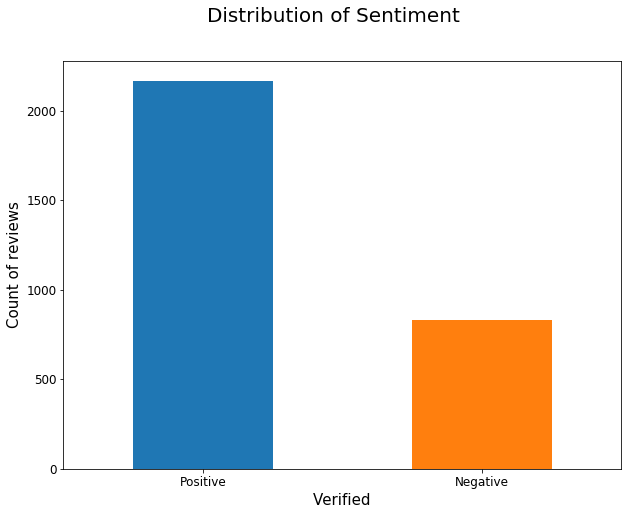

In [24]:
# Distribution of Target in our data.
data1.sentiment.value_counts().plot(kind = 'bar',figsize=(10,7.5))
plt.suptitle('Distribution of Sentiment',**title_font)
plt.xticks(np.arange(2),('Positive', 'Negative'),fontsize=12,rotation=0,fontname='sans serif')
plt.xlabel('Verified',**label_font)
plt.yticks(fontsize=12,fontname='sans serif')
plt.ylabel('Count of reviews',**label_font)
plt.show()

## Lets work on each columns

## displayImageUrl

In [25]:
print('Number of missing values :',data1['displayImageUrl'].isna().sum())
print('Percentage of missing values :',data1['displayImageUrl'].isna().sum()/data1.shape[0])

Number of missing values : 2774
Percentage of missing values : 0.9246666666666666


In [26]:
print('Numer of unique values :',data1['displayImageUrl'].nunique())
print('Percentage of unique values:',data1['displayImageUrl'].nunique()/data1.shape[0])

Numer of unique values : 226
Percentage of unique values: 0.07533333333333334


- displayImageUrl has 92.46 % of null values and remaining 7.54 % are unique values. This column can be dropped

In [27]:
data1.drop('displayImageUrl', axis=1,inplace=True)

## createDate and updateDate

In [28]:
data1['createDate'] = pd.to_datetime(data1['createDate']) # Converting createDate to date object
data1['updateDate'] = pd.to_datetime(data1['updateDate']) # Converting updateDate to date object

In [29]:
print(data1['createDate'].isna().sum())
print(data1['updateDate'].isna().sum())

0
0


In [30]:
print('Date on which data extraction started :',data1['createDate'].min()) # Date on which data extraction started.
print('Date on which data extraction ended :',data1['createDate'].max()) # Date on which data extraction ended.

Date on which data extraction started : 2019-08-01 18:46:16.677000
Date on which data extraction ended : 2019-08-19 06:07:06.109000


###### ** We can extract the number of reviews that are updated from createDate and updateDate columns

## is_review_updated

In [31]:
data1['is_review_updated'] = data1['updateDate'] - data1['createDate']

In [32]:
data1['is_review_updated'] = np.where((data1['is_review_updated']>'00:00:00'),1,0)

In [33]:
data1.is_review_updated.value_counts()

0    2687
1     313
Name: is_review_updated, dtype: int64

In [34]:
pd.crosstab(data1.is_review_updated,data1.sentiment)

sentiment,0,1
is_review_updated,,
0,709,1978
1,121,192


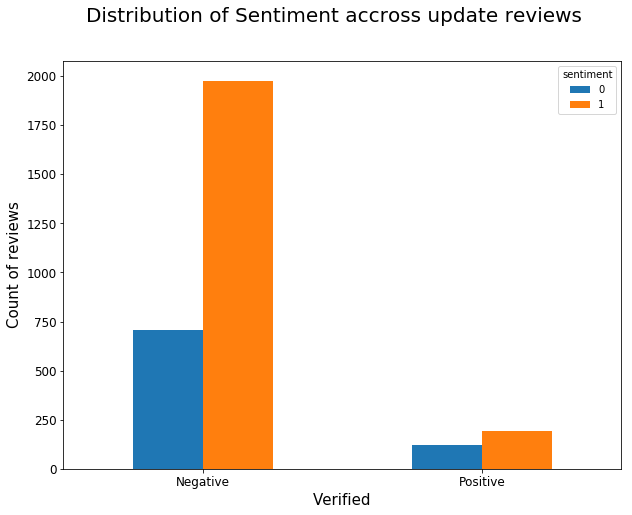

In [35]:
# Distribution of Target in our data.
pd.crosstab(data1.is_review_updated,data1.sentiment).plot(kind = 'bar',figsize=(10,7.5))
plt.suptitle('Distribution of Sentiment accross update reviews',**title_font)
plt.xticks(np.arange(2),('Negative', 'Positive'),fontsize=12,rotation=0,fontname='sans serif')
plt.xlabel('Verified',**label_font)
plt.yticks(fontsize=12,fontname='sans serif')
plt.ylabel('Count of reviews',**label_font)
plt.show()

### Observations
- There are 313 users who have updated thier reviews.
- If we can find the reasons behind these updates we can gather some improvement points.
- If the user has decreased the score then we can find out the cause behind and rectify it in future movies.
- With more web scrapping we might be able to find the scores before and after update.
- For now looking into the reviews given by the updated users can help us.

In [36]:
# collecting ids of users who have updated thier reviews for further analysis.
review_updated_ids = data1[(data1['is_review_updated'] == 1)].index

## Day_of_review

In [37]:
#Collected day information and saved it in new column Day_of_review
data1['Day_of_review'] = data1['updateDate'].apply(lambda x: x.to_period('D')) #as updateDate is the latest date. we are using it

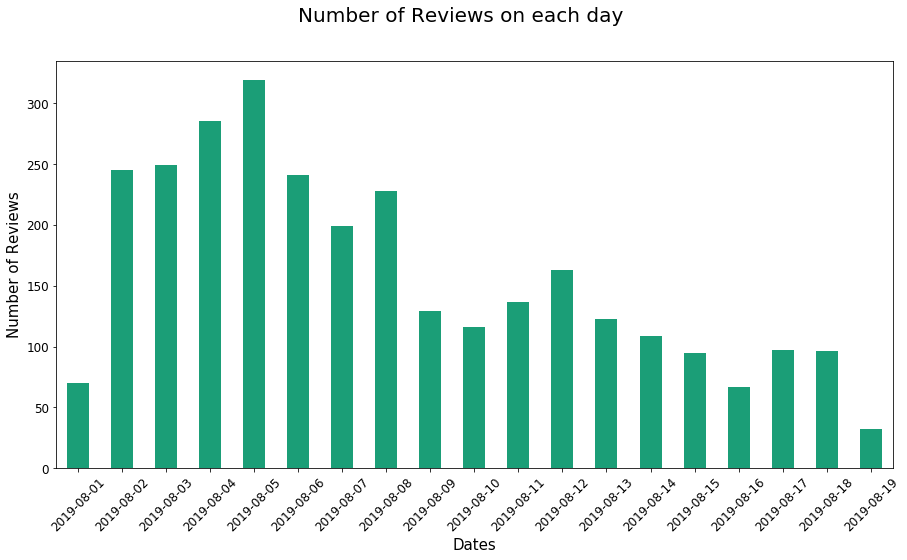

In [38]:
# Distribution of number of reviews on each day
data1['Day_of_review'].value_counts().sort_index().plot.bar(figsize=(15,7.5),colormap='Dark2')
plt.suptitle('Number of Reviews on each day',**title_font)
plt.xticks(fontsize=12,rotation=45,fontname='sans serif')
plt.xlabel('Dates',**label_font)
plt.yticks(fontsize=12,fontname='sans serif')
plt.ylabel('Number of Reviews',**label_font)
plt.show()

### Observations
- Number of reviews started decreasing on 5 Aug, 2019. i.e. 18 days after release of the movie.
<br>
<br>
- 5 Aug, 2019 : News article on Sonic movie CGI controversy. https://www.cnet.com/how-to/sonic-the-hedgehog-movie-cast-plot-release-date-cgi-controversy/
    - This controvery might impact all the animation movies as the users will start comparing all the animation movies released recently.
    - And there are new movie releases on these dates. (Hobs and Shaw).
<br>
<br>
- 8 Aug, 2019 : https://www.youtube.com/watch?v=6T7YcL5-CJc - "The Music of The Lion King" Featurette | The Lion King
    - Reviews have increased afther this video release. This might indicate that the users have watched the movie after this featurette release in youtube. So this featurette was successful.
<br>
<br>
- 12 Aug, 2019 : News article on Cnet published on 11 Aug https://www.cnet.com/news/the-lion-king-overtakes-frozen-as-disneys-biggest-animated-movie-ever/
    - User traffic to the movie may have increased after the release of this article.
<br>
<br>
- 18 Aug, 2019 : News arcticle on Cnet https://www.cnet.com/news/lion-king-remake-is-the-9th-highest-grossing-film-ever/
    - User traffic to the movie may have increased after the release of this article.
<br>
<br>
- All the above points indicate that the number of users watching the movie has increased in these days or the users who have watched the film earlier and forgot to leave a review have left the review in these days.

In [39]:
# Percentage of positive and negative of reviews on each day
pd.crosstab(data1.sentiment, data1.Day_of_review,normalize='columns')*100

Day_of_review,2019-08-01,2019-08-02,2019-08-03,2019-08-04,2019-08-05,2019-08-06,2019-08-07,2019-08-08,2019-08-09,2019-08-10,2019-08-11,2019-08-12,2019-08-13,2019-08-14,2019-08-15,2019-08-16,2019-08-17,2019-08-18,2019-08-19
sentiment,,,,,,,,,,,,,,,,,,,
0,30.0,30.612245,33.73494,24.210526,26.959248,22.821577,31.658291,25.0,24.031008,29.310345,33.576642,26.993865,27.642276,23.853211,31.578947,34.328358,25.773196,19.791667,25.0
1,70.0,69.387755,66.26506,75.789474,73.040752,77.178423,68.341709,75.0,75.968992,70.689655,66.423358,73.006135,72.357724,76.146789,68.421053,65.671642,74.226804,80.208333,75.0


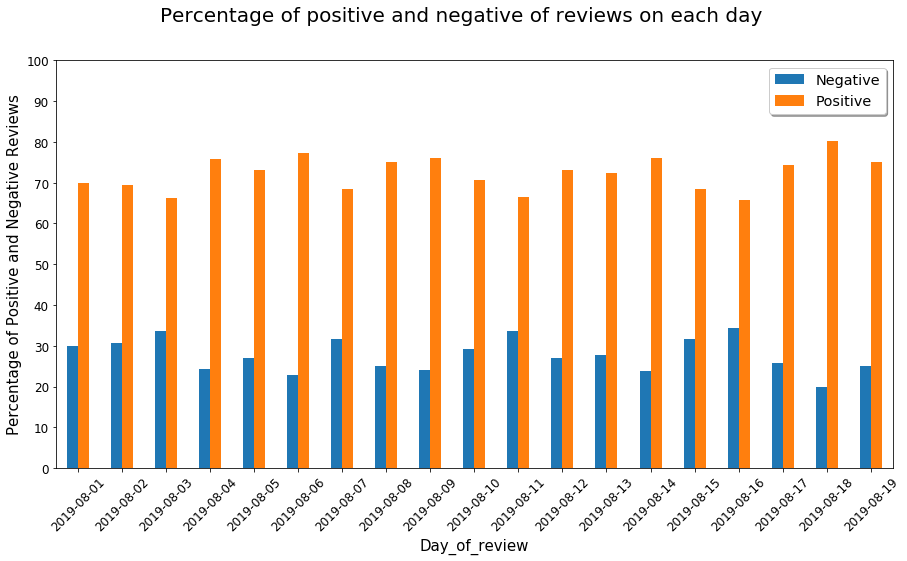

In [40]:
# Percentage of positive and negative of reviews on each day
(pd.crosstab(data1.Day_of_review, data1.sentiment,normalize='index')*100).plot(kind = 'bar',figsize=(15,7.5))
plt.suptitle('Percentage of positive and negative of reviews on each day',**title_font)
plt.legend(loc=1, fontsize = 'x-large',shadow = bool,labels = ['Negative', 'Positive'])
plt.xticks(fontsize=12,rotation=45,fontname='sans serif')
plt.xlabel('Day_of_review',**label_font)
plt.yticks(np.arange(0, 101, 10.0),fontsize=12,fontname='sans serif')
plt.ylabel('Percentage of Positive and Negative Reviews',**label_font)
plt.show()

##### OBSERVATIONS
- From Aug 1 to Aug 19 the % of positive reviews is around 70%
- From Aug 1 to Aug 19 the % of negative reviews is around 30%
- The ratio between positive and negative reviews is fairly same on all these days. It is an indictor that the movie is still running on a positive note.

##### Dropping create date and update data

In [41]:
## Removing updateDate and createDate  after deriving is_review_updated from it.
data1.drop('createDate',inplace=True,axis=1)
data1.drop('updateDate',inplace=True,axis=1)

## timeFromCreation

##### We can get this timeFromCreation from date of review, if needed. so lets drop this column

In [42]:
data1.drop('timeFromCreation',axis=1,inplace=True)

## hasProfanity

In [43]:
data1.hasProfanity.value_counts()

False    2969
True       31
Name: hasProfanity, dtype: int64

In [44]:
data1.hasProfanity.isna().sum()

0

In [45]:
pd.crosstab(data1.hasProfanity,data1.sentiment)

sentiment,0,1
hasProfanity,,
False,811,2158
True,19,12


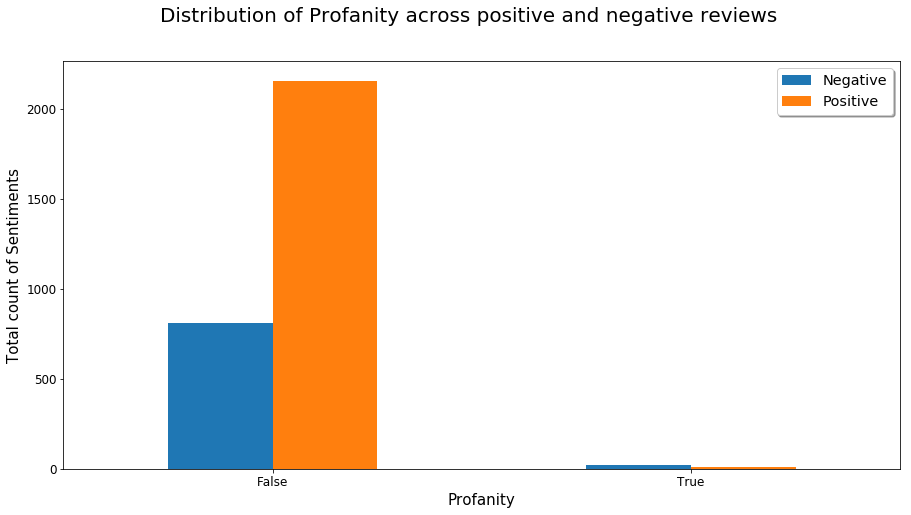

In [46]:
# Distribution of Profanity across positive and negative reviews
pd.crosstab(data1.hasProfanity,data1.sentiment).plot(kind = 'bar',figsize=(15,7.5))
plt.suptitle('Distribution of Profanity across positive and negative reviews',**title_font)
plt.legend(loc=1, fontsize = 'x-large',shadow = bool,labels = ['Negative', 'Positive'])
plt.xticks(fontsize=12,rotation=0,fontname='sans serif')
plt.xlabel('Profanity',**label_font)
plt.yticks(fontsize=12,fontname='sans serif')
plt.ylabel('Total count of Sentiments',**label_font)
plt.show()

### Observations
- There are 31 reviews with profanity, which is very low when compared to 2969.
- The low numbers in profanity indicate that there is no or very little bad talk about the movie which is a good indicator.
- Being a kids movie may also be the reason for low profanity.

## hasSpoilers

In [47]:
data1.hasSpoilers.value_counts()

False    2998
True        2
Name: hasSpoilers, dtype: int64

In [48]:
data1.hasSpoilers.isna().sum()

0

In [49]:
pd.crosstab(data1.hasSpoilers,data1.sentiment)

sentiment,0,1
hasSpoilers,,
False,828,2170
True,2,0


### Observations
- There are 2 reviews with spoilers, which is very low when compared to 2998.
- As this movie is a remake of old lion king movie, which most of the users has already watched. There is no scope for spoilers.

##### We have very few observations that has spoilers in the reviews(2 out of 2998). I doesnt give any important information.

In [50]:
# Dropping hasSpoilers
data1.drop('hasSpoilers',axis=1,inplace=True)

## isSuperReviewer

In [51]:
data1.isSuperReviewer.value_counts()

False    2999
True        1
Name: isSuperReviewer, dtype: int64

In [52]:
data1.isSuperReviewer.isna().sum()

0

In [53]:
pd.crosstab(data1.isSuperReviewer,data1.sentiment)

sentiment,0,1
isSuperReviewer,,
False,829,2170
True,1,0


### Observations
- There is only 1 review which is given by a SuperReviewer.
- It is not possible to get any meaningful generalization with these numbers.

In [54]:
# Dropping isSuperReviewer
data1.drop('isSuperReviewer',axis=1,inplace=True)

## isVerified

In [55]:
data1.isVerified.value_counts()

True     2159
False     841
Name: isVerified, dtype: int64

In [56]:
data1.isVerified.isna().sum()

0

In [57]:
pd.crosstab(data1.isVerified,data1.sentiment)

sentiment,0,1
isVerified,,
False,401,440
True,429,1730


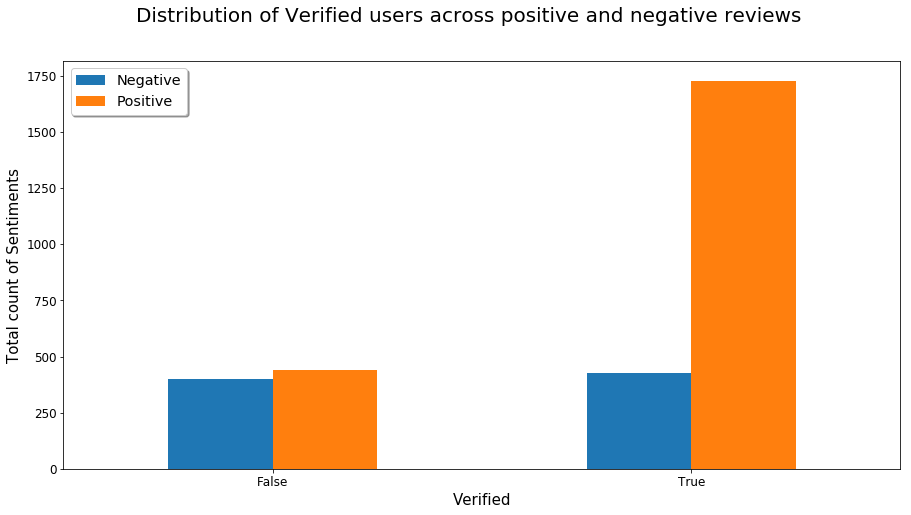

In [58]:
# Distribution of Verified users across positive and negative reviews
pd.crosstab(data1.isVerified,data1.sentiment).plot(kind = 'bar',figsize=(15,7.5))
plt.suptitle('Distribution of Verified users across positive and negative reviews',**title_font)
plt.legend(loc=0, fontsize = 'x-large',shadow = bool,labels = ['Negative', 'Positive'])
plt.xticks(fontsize=12,rotation=0,fontname='sans serif')
plt.xlabel('Verified',**label_font)
plt.yticks(fontsize=12,fontname='sans serif')
plt.ylabel('Total count of Sentiments',**label_font)
plt.show()

### Observations
- There are 2159 verified reviews out of 3000 reviews.
- Verified reviews can give meaningful insights.
- It is very important to analyse the verified negative reviews to find out the issues with the movie and rectify them future projects.

#### Note: Negative ratings given by verified users are really important.

In [59]:
# collecting ids of verified negative reviews for further analysis.
verified_neg_review_ids = data1[(data1['isVerified'] == True) & (data1['sentiment'] == 0)].index

In [60]:
verified_neg_review_ids

Int64Index([   5,   21,   23,   30,   35,   41,   43,   72,   74,   94,
            ...
            2938, 2949, 2951, 2957, 2964, 2967, 2975, 2978, 2985, 2986],
           dtype='int64', length=429)

## rating and score

In [61]:
data1.rating.value_counts()

STAR_5      1360
STAR_4       437
STAR_3       285
STAR_3_5     197
STAR_4_5     176
STAR_2       171
STAR_2_5     123
STAR_0_5     113
STAR_1        90
STAR_1_5      48
Name: rating, dtype: int64

In [62]:
data1.score.value_counts()

5.0    1360
4.0     437
3.0     285
3.5     197
4.5     176
2.0     171
2.5     123
0.5     113
1.0      90
1.5      48
Name: score, dtype: int64

##### Rating and Score is given the same information. Lets drop rating

In [63]:
data1.drop('rating',axis=1,inplace=True)

##### Our target attribute is derived from score. So we will drop it before model building. We can use score for EDA.

In [64]:
data1.score.isna().sum()

0

In [65]:
data1.score.value_counts()

5.0    1360
4.0     437
3.0     285
3.5     197
4.5     176
2.0     171
2.5     123
0.5     113
1.0      90
1.5      48
Name: score, dtype: int64

### Observations
- There are 408 users who gave 2.5 and 3.0 rating. If we analyse these reviews we can find the issues that we have to wokr on.
- A user giving 3.0 rating implies that there were some minor details that he didnt like which stopped him from given a rating of 3.5 or 4.0.

In [66]:
# collecting ids of reviews given by users who gave 2.5 and 3.0 rating for further analysis.
medium_scorers_ids = data1[(data1['score'] == 3.0) | (data1['score'] == 2.5)].index

## number_of_movies_rated

In [67]:
data1.number_of_movies_rated.value_counts().sort_index()

0     2383
1      149
2       61
3       70
4       35
5       26
6       19
7       22
8        9
9       10
10       9
11       4
12       5
13      10
14      11
15      11
16      13
17      25
18      29
19      31
20      68
Name: number_of_movies_rated, dtype: int64

## isFrequentReviewer

- Reviews from users who watch more movies and give frequent reviews are more meaningful to analyse and get insights.
- In our data we are considering that if a user has reviewed more than 4 movies is considered as frequent movie reviewer.

In [68]:
## Creating 2 groups of users based on number of movies he rated.
## Here User who has rated more than 4 movies is considered as frequent movie reviewer.
bins = [0,4,20]
data1['isFrequentReviewer'] = pd.cut(data1['number_of_movies_rated'], bins,include_lowest=True,labels=['False','True'])

In [69]:
data1.drop('number_of_movies_rated',axis=1,inplace=True)

In [70]:
data1['isFrequentReviewer'].value_counts()

False    2698
True      302
Name: isFrequentReviewer, dtype: int64

In [71]:
pd.crosstab(data1.isFrequentReviewer,data1.sentiment)

sentiment,0,1
isFrequentReviewer,,
False,662,2036
True,168,134


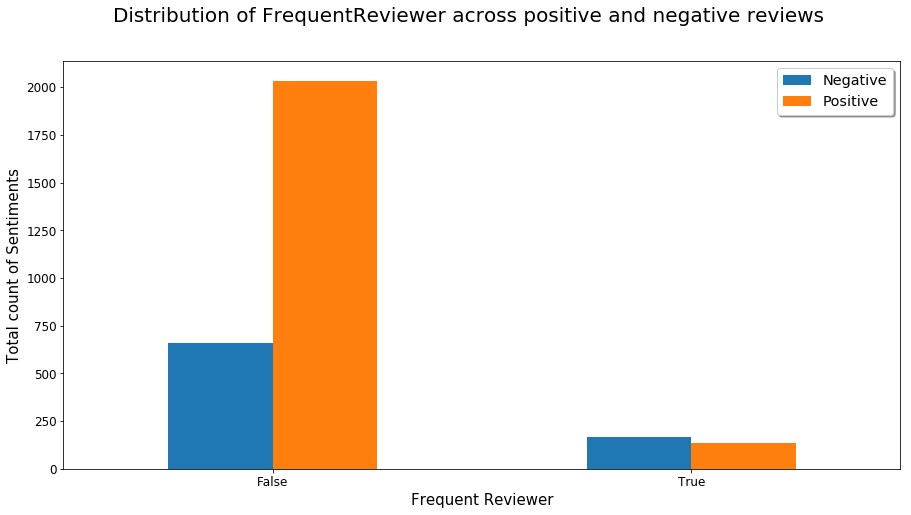

In [72]:
# Distribution of FrequentReviewer across positive and negative reviews.
pd.crosstab(data1.isFrequentReviewer,data1.sentiment).plot(kind = 'bar',figsize=(15,7.5))
plt.suptitle('Distribution of FrequentReviewer across positive and negative reviews',**title_font)
plt.legend(loc=0, fontsize = 'x-large',shadow = bool,labels = ['Negative', 'Positive'])
plt.xticks(fontsize=12,rotation=0,fontname='sans serif')
plt.xlabel('Frequent Reviewer',**label_font)
plt.yticks(fontsize=12,fontname='sans serif')
plt.ylabel('Total count of Sentiments',**label_font)
plt.show()

#### Observations
- 168 frequent movie reviewers gave negative ratings to The Lion King.
- 134 frequent movie reviewers gave positive ratings to The Lion King.
- Analysing these reviews can given meaningful insights.

In [73]:
data1.sample(5)

,userId,displayName_x,hasProfanity,isVerified,realm,score,fav_genre1,fav_genre2,fav_genre3,review,sentiment,is_review_updated,Day_of_review,isFrequentReviewer
1808,943816646,unknown,False,False,RT,3.5,Action & Adventure,Science Fiction & Fantasy,Drama,"Great film but beyond the stunning visuals, ve...",1,0,2019-08-05,True
626,977880981,Briseyda G,False,False,RT,5.0,Action & Adventure,Animation,Science Fiction & Fantasy,I loved every minute of it! Gave me chills thr...,1,0,2019-08-12,False
1492,a0c84712-cb7f-4cf3-964c-6098843f0375,Amanda L,False,True,Fandango,5.0,no_movie_rated,no_movie_rated,no_movie_rated,Loved it. Stayed true to the characters.,1,0,2019-08-07,False
2290,eaacc895-f2ae-4f7f-9a3d-eeca3045961f,Brian,False,True,Fandango,4.5,no_movie_rated,no_movie_rated,no_movie_rated,Better than the first lion king,1,0,2019-08-04,False
2288,DB07004D-BB35-4DB0-8CC9-EA1EAC63F1F2,SP,False,True,Fandango,3.5,no_movie_rated,no_movie_rated,no_movie_rated,I'm a fan of the first one but this was good.,1,0,2019-08-04,False


#### Renaming the columns for better understanding

In [74]:
data1.rename(columns={'userId':'ReviewID',
                      'displayName_x':'Reviewer_Name',
                      'score':'Rating',
                      'Day_of_review':'Date_of_Review'},
             inplace=True)

In [75]:
data1.columns

Index(['ReviewID', 'Reviewer_Name', 'hasProfanity', 'isVerified', 'realm',
       'Rating', 'fav_genre1', 'fav_genre2', 'fav_genre3', 'review',
       'sentiment', 'is_review_updated', 'Date_of_Review',
       'isFrequentReviewer'],
      dtype='object')

In [76]:
cols = ['ReviewID','Reviewer_Name','review','Rating','Date_of_Review','is_review_updated','hasProfanity','isVerified','isFrequentReviewer','realm','fav_genre1','fav_genre2','fav_genre3','sentiment']

In [77]:
data1 = data1[cols]

In [78]:
data1.sample()

,ReviewID,Reviewer_Name,review,Rating,Date_of_Review,is_review_updated,hasProfanity,isVerified,isFrequentReviewer,realm,fav_genre1,fav_genre2,fav_genre3,sentiment
1839,c9e92663-d4c0-44a1-afc0-882a657b2f62,Carol T,I liked everything about the movie. I have se...,5.0,2019-08-05,0,False,True,False,Fandango,no_movie_rated,no_movie_rated,no_movie_rated,1


In [79]:
data1.sentiment.value_counts()

1    2170
0     830
Name: sentiment, dtype: int64

## Fav_Genre1 ,Fav_Genre1, Fav_Genre3
- Based on the genre of movies that the users frequently watch. We have extracted the top 3 favorite genre for each user.

In [80]:
# Number of users from whom we could extract thier favorite genre.
print(data1.loc[data1.fav_genre1!='no_movie_rated'].shape)
print('Number of users from whom we could extract thier favorite genre :',data1.loc[data1.fav_genre1!='no_movie_rated'].shape[0])

(617, 14)
Number of users from whom we could extract thier favorite genre : 617


In [81]:
# Distribution of sentiments of 617 users
data1.loc[data1.fav_genre1!='no_movie_rated','sentiment'].value_counts()

0    352
1    265
Name: sentiment, dtype: int64

### Observation
- We could extract information from 617 users.
- Out of these users 352 users gave negative reviews and 265 users gave positive reviews.

### Genre of The Lion King (2019) : Action & Adventure, Animation, Drama

- The idea here is to check the sentiment distribution of users whose favorite genre is the same as The Lion King i.e. (Action & Adventure, Animation, Drama)

### First Favorite Genres

In [82]:
data1.loc[data1.fav_genre1!='no_movie_rated','fav_genre1'].value_counts()

Drama                        298
Action & Adventure           197
Animation                     44
Comedy                        31
Science Fiction & Fantasy     21
Horror                        18
Kids & Family                  4
Mystery & Suspense             3
Special Interest               1
Name: fav_genre1, dtype: int64

In [83]:
# fav_genre1_sentiments = data1.loc[data1.fav_genre1!='no_movie_rated',('fav_genre1','sentiment')]
# pd.crosstab(fav_genre1_sentiments.sentiment,fav_genre1_sentiments.fav_genre1)
fav_genre1_sentiments = data1.loc[(data1.fav_genre1=='Action & Adventure')|
                                  (data1.fav_genre1=='Animation')|
                                  (data1.fav_genre1=='Drama')
                                  ,('fav_genre1','sentiment')]
pd.crosstab(fav_genre1_sentiments.sentiment,fav_genre1_sentiments.fav_genre1)

fav_genre1,Action & Adventure,Animation,Drama
sentiment,,,
0,118,26,170
1,79,18,128


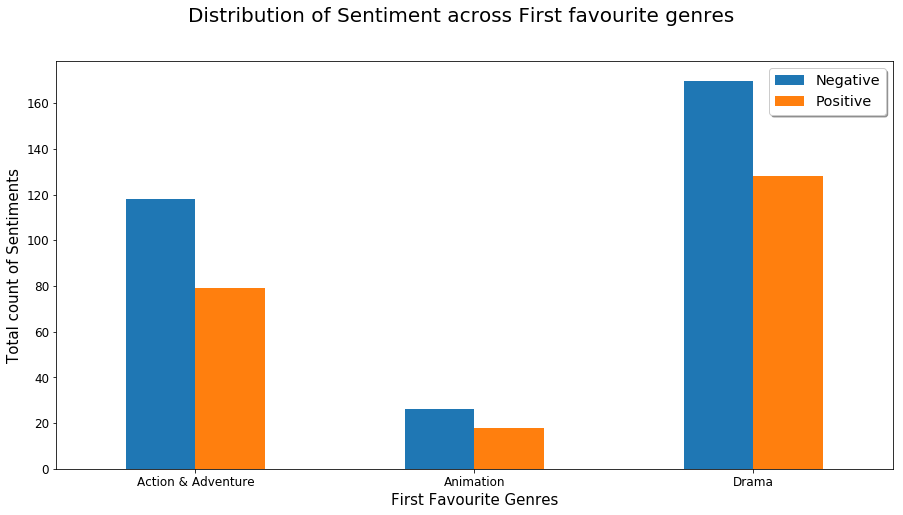

In [84]:
pd.crosstab(fav_genre1_sentiments.fav_genre1,fav_genre1_sentiments.sentiment).plot(kind = 'bar',figsize=(15,7.5))
plt.suptitle('Distribution of Sentiment across First favourite genres',**title_font)
plt.legend(loc=0, fontsize = 'x-large',shadow = bool,labels = ['Negative', 'Positive'])
plt.xticks(fontsize=12,rotation=0,fontname='sans serif')
plt.xlabel('First Favourite Genres',**label_font)
plt.yticks(fontsize=12,fontname='sans serif')
plt.ylabel('Total count of Sentiments',**label_font)
plt.show()

### Observations:
- There are 298 users who has Drama as thier first favourite genre. Out of which 170 gave negative review and 128 gave positive review.
- There are 197 users who has Action and Adventure as thier first favourite genre. Out of which 118 gave negative review and 79 gave positive review.
- There are 44 users who has Animation as thier first favourite genre. Out of which 26 gave negative review and 18 gave positive review.
- Out of 539 users whose first favourite genre is same as lion king. 314 users i.e. 58% gave negative review implies that there are some places where the movie can be improved.
- Looking into these reviews can help us understand the issue.

### Second Favorite Genres

In [85]:
data1.loc[data1.fav_genre1!='no_movie_rated','fav_genre2'].value_counts()

Animation                    210
Action & Adventure           117
Science Fiction & Fantasy     93
Drama                         93
Comedy                        38
Mystery & Suspense            23
Horror                        18
Kids & Family                 16
Musical & Performing Arts      3
Documentary                    2
Romance                        2
Classics                       2
Name: fav_genre2, dtype: int64

In [86]:
# fav_genre2_sentiments = data1.loc[data1.fav_genre1!='no_movie_rated',('fav_genre2','sentiment')]
# pd.crosstab(fav_genre2_sentiments.sentiment,fav_genre2_sentiments.fav_genre2,)
fav_genre2_sentiments = data1.loc[(data1.fav_genre2=='Action & Adventure')|
                                  (data1.fav_genre2=='Animation')|
                                  (data1.fav_genre2=='Drama')
                                  ,('fav_genre2','sentiment')]
pd.crosstab(fav_genre2_sentiments.sentiment,fav_genre2_sentiments.fav_genre2)

fav_genre2,Action & Adventure,Animation,Drama
sentiment,,,
0,61,121,52
1,56,89,41


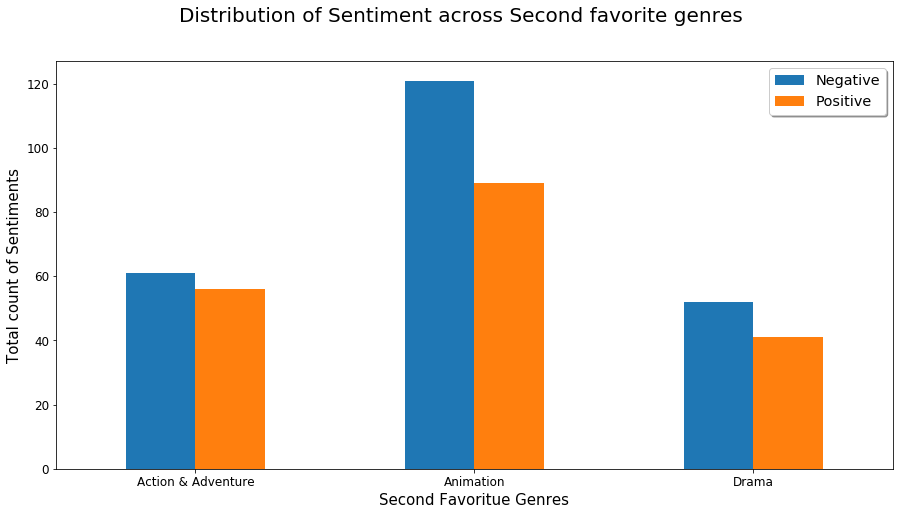

In [87]:
pd.crosstab(fav_genre2_sentiments.fav_genre2,fav_genre2_sentiments.sentiment).plot(kind = 'bar',figsize=(15,7.5))
plt.suptitle('Distribution of Sentiment across Second favorite genres',**title_font)
plt.legend(loc=0, fontsize = 'x-large',shadow = bool,labels = ['Negative', 'Positive'])
plt.xticks(fontsize=12,rotation=0,fontname='sans serif')
plt.xlabel('Second Favoritue Genres',**label_font)
plt.yticks(fontsize=12,fontname='sans serif')
plt.ylabel('Total count of Sentiments',**label_font)
plt.show()

#### Observations:
- There are 210 users who has Animation as thier second favourite genre. Out of which 121 gave negative review and 89 gave positive review.
- There are 117 users who has Action and Adventure as thier second favourite genre. Out of which 61 gave negative review and 56 gave positive review.
- There are 93 users who has Drama as thier second favourite genre. Out of which 52 gave negative review and 41 gave positive review.
- Out of 420 users whose second favourite genre is same as lion king. 234 users i.e. 55% gave negative review implies that there are some places where the movie can be improved.
- Looking into these reviews can help us understand the issue.

### Third Favorite Genres

In [88]:
data1.loc[data1.fav_genre1!='no_movie_rated','fav_genre3'].value_counts()

Action & Adventure           212
Science Fiction & Fantasy    101
Drama                         86
Animation                     63
Comedy                        50
Kids & Family                 38
Mystery & Suspense            33
Horror                        14
Romance                       12
Documentary                    4
Sports & Fitness               1
Musical & Performing Arts      1
Cult Movies                    1
Art House & International      1
Name: fav_genre3, dtype: int64

In [89]:
# fav_genre3_sentiments = data1.loc[data1.fav_genre1!='no_movie_rated',('fav_genre3','sentiment')]
# pd.crosstab(fav_genre3_sentiments.sentiment,fav_genre3_sentiments.fav_genre3,)
fav_genre3_sentiments = data1.loc[(data1.fav_genre3=='Action & Adventure')|
                                  (data1.fav_genre3=='Animation')|
                                  (data1.fav_genre3=='Drama')
                                  ,('fav_genre3','sentiment')]
pd.crosstab(fav_genre3_sentiments.sentiment,fav_genre3_sentiments.fav_genre3)

fav_genre3,Action & Adventure,Animation,Drama
sentiment,,,
0,127,34,50
1,85,29,36


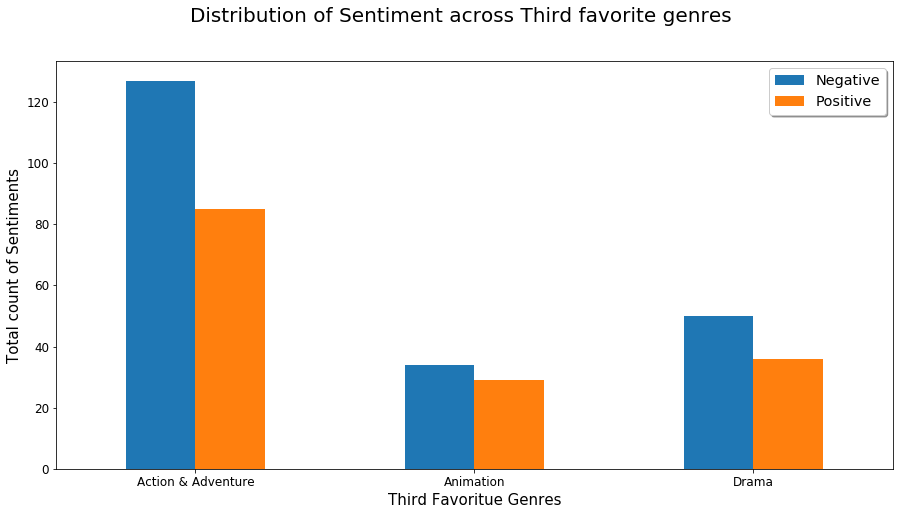

In [90]:
pd.crosstab(fav_genre3_sentiments.fav_genre3,fav_genre3_sentiments.sentiment).plot(kind = 'bar',figsize=(15,7.5))
plt.suptitle('Distribution of Sentiment across Third favorite genres',**title_font)
plt.legend(loc=0, fontsize = 'x-large',shadow = bool,labels = ['Negative', 'Positive'])
plt.xticks(fontsize=12,rotation=0,fontname='sans serif')
plt.xlabel('Third Favoritue Genres',**label_font)
plt.yticks(fontsize=12,fontname='sans serif')
plt.ylabel('Total count of Sentiments',**label_font)
plt.show()

#### Observations:
- There are 212 users who has Action and Adventure as thier third favourite genre. Out of which 127 gave negative review and 85 gave positive review.
- There are 63 users who has Animation as thier third favourite genre. Out of which 34 gave negative review and 29 gave positive review.
- There are 86 users who has Drama as thier third favourite genre. Out of which 50 gave negative review and 36 gave positive review.
- Out of 361 users whose third favourite genre is same as lion king. 211 users i.e. 58% gave negative review implies that there are some places where the movie can be improved.
- Looking into these reviews can help us understand the issue.

# Reviews

In [91]:
pd.set_option('display.max_colwidth', -1)
data1.review

0       Really enjoyed it. The songs were amazing and the visuals were spectacular. I see what people are saying about it’s like if emotion and dullness, but I personally liked it and if you ever liked the original than you’ll like this. The acting and singing was amazing!                                                                                                                                                                                                                                                          
1       Realky enjoyable. We've seen the original animated movie, the stage play and now the live action movie and it's a worthy extension of the story.                                                                                                                                                                                                                                                                                                                                    

The following steps are done on reviews.
1. Sentence Tokenization
    - Length of sentences
2. Word Tokenization
    - Removing contractions
    - Split into tokens by white space.
    - Removed special characters from each token.
    - Filtered out stop words
    - Lemmatizing
    - Filtered out short tokens

## Sentence Tokenization

In [92]:
data1['modified_review'] = [sent_tokenize(i) for i in data1.review]

In [93]:
data1['number_of_sentences'] = [len(i) for i in data1.modified_review]

In [94]:
print('Minimum number of sentences in our reviews is',min(data1['number_of_sentences']))
print('Maximum number of sentences in our reviews is',max(data1['number_of_sentences']))

Minimum number of sentences in our reviews is 1
Maximum number of sentences in our reviews is 63


In [95]:
# Review with maximum number of sentences
data1.loc[data1['number_of_sentences'] == max(data1['number_of_sentences']),('review','sentiment')]

,review,sentiment
585,"Soooooo Lion King. Yeaaaaaa. I've got a rant with spoilers in the event that you've never seen the original. There's your warning....\r\n\r\nThe Lion King remake. What can I say about this movie other than it was super incredibly disappointing. More disappointing than any remake of anything in recent memory. \r\n\r\nHere's what is great. The casting was suuuuuuuuuper fantastic. Everyone sounded like the original cast. Whether that is intentional or just a happy circumstance, I don't care. Well done. Visuals? Impressive as ever. It looked how I imagine the Serengeti would look. Music? Also, well done. Very well done. With the exception of 'Can You Feel the Love Tonight?' We get it Beyonce. You have some pipes. You're still trash and I don't care what anyone says. Your music sucks and you almost destroy a song because you clearly want people to know you're a singer. FUCK OFF!\r\n\r\nAll right. Now that I've got the great stuff out of the way you're probably thinking I had a typo when I said it was disappointing. I didn't. Despite all of those things, it was missing the most important piece of what made this movie such a classic...EMOTION! There was no emotion displayed from any of these creatures during any given moment. The quintessential scene of Simba trying to get his dead father up should've gotten me, a 30 year old man, to bawl my eyes out on my tears. Not. One. Shred. Of. Sadness. The cartoon makes me misty eyed to this day. That's not a lie. This hyper realism should've done that and more. It didn't. \r\n\r\nAlso, there were changes with certain scenes' dialogue that should never have been changed. The scene of Simba speaking to the spectre of Mufasa. Such a POWERFUL scene in the cartoon. Mufasa tells his son that he has lost himself. Moreover, because he lost himself he had therefore forgotten about his father, whom he (Simba) claims to love. It was a powerful scene that really enlightened Simba to the realization of the consequences of him trying to hide from what has happened and to hide from who really is. What did the remake do? Tell Simba that he needed to reclaim his place on the throne so he can reclaim his place in the Circle of Life. While not terrible, IT MISSES THE MOST IMPORTANT PIECE OF CHARACTERIZATION FOR SIMBA. \r\n\r\nJon Favreau is undoubtedly talented. I love Iron Man 1 obviously. The Jungle Book remake was perfect. While certain things were changed, they were changed well. THe Lion King is not an example of this. I had no emotional connection to ANY of these characters. I should have come out of this movie on CLOUD FUCKING 9 because of how much this movie means to me. Both, with the joy it brought to me as a youth and with an appreciation of the story being told when I reached adulthood. It saddens me. The cartoon is the best way to see this movie, undoubtedly. You can see the emotion of all the characters. The joy, the sadness, the disdain, the anger, everything. You don't get this with the remake. 1.75/5. I am truly sad to say this :(",0


In [96]:
pd.crosstab(data1.sentiment, data1.number_of_sentences)

number_of_sentences,1,2,3,4,5,6,7,8,9,10,...,18,19,20,22,24,25,27,28,46,63
sentiment,,,,,,,,,,,,,,,,,,,,,
0,275,202,123,75,55,30,16,12,10,5,...,1,2,1,2,0,0,1,1,1,1
1,840,679,357,144,61,37,25,7,8,3,...,0,1,1,0,1,1,0,0,0,0


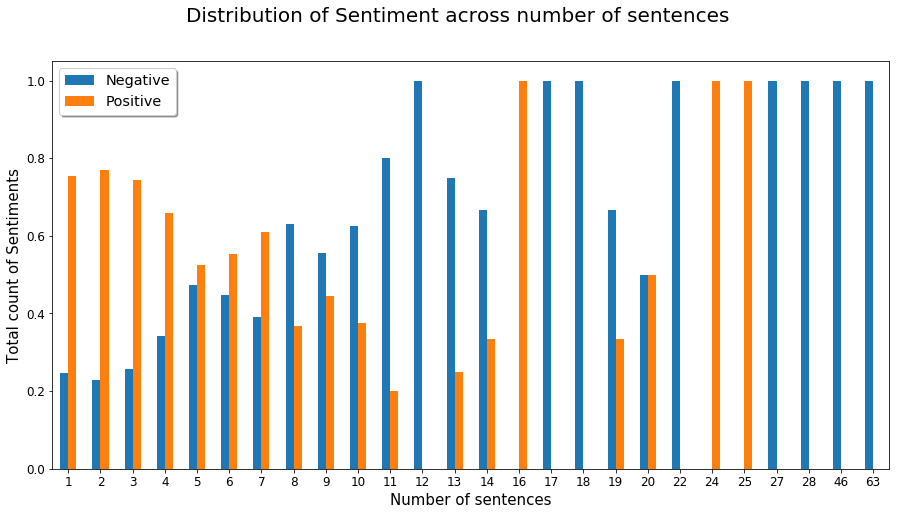

In [97]:
pd.crosstab(data1.number_of_sentences, data1.sentiment,normalize='index').plot(kind = 'bar',figsize=(15,7.5))
plt.suptitle('Distribution of Sentiment across number of sentences',**title_font)
plt.legend(loc=0, fontsize = 'x-large',shadow = bool,labels = ['Negative', 'Positive'])
plt.xticks(fontsize=12,rotation=0,fontname='sans serif')
plt.xlabel('Number of sentences',**label_font)
plt.yticks(fontsize=12,fontname='sans serif')
plt.ylabel('Total count of Sentiments',**label_font)
plt.show()

### Observation
- As the number of sentences increase the ratings tends to be negative.

### Word Tokentization

In [98]:
data1['modified_review'] = [word_tokenize(i) for i in data1.review]

In [99]:
data1['number_of_words'] = [len(i) for i in data1.modified_review]

In [100]:
print('Minimum number of words in our reviews is',min(data1['number_of_words']))
print('Maximum number of sentences in our reviews is',max(data1['number_of_words']))

Minimum number of words in our reviews is 2
Maximum number of sentences in our reviews is 878


In [101]:
# Review with maximum number of sentences
data1.loc[data1['number_of_words'] == max(data1['number_of_sentences']),('review','sentiment')]

,review,sentiment
109,Animation was good. Nearly every line was the exact same as the old movie though so its very boring. Besides the way the movie looks it is the exact same. Dont really understand why they remade this one. At least the Aladdin remake had some changes to the story line and new songs to keep it fresh and entertaining,0
124,"I really liked this remake of the Disney Classic. I didn't like how the movie changed certain iconic aspects of the original. Overall though, the movie was basically the exact same as the original and also includes a few extra scenes that help to tell the story. I would definitely go see this before it leaves theaters!",1
2002,"I couldnt help but play the original in my head the entire time I watched this movie. The raw emotion, composition, and voice acting was simply lost inside some photorealistic portayal of beloved characters. It was honestly painful to watch because of it.\r\n\r\nThat being said, no reason you cant enjoy it as its own thing.",0
2205,"Loved it. Brought back all of the good feelings from the original. Great characters, amazing CG, fun for the whole family. The actor all did an amazing job with the voices. Really enjoyed this. Did not feel like over 2.5 hours. Only drawback was we didn't like Beyonce's remake of a song.",1


In [102]:
pd.crosstab(data1.sentiment, data1.number_of_words)

number_of_words,2,3,4,5,6,7,8,9,10,11,...,385,392,425,477,481,491,541,636,795,878
sentiment,,,,,,,,,,,,,,,,,,,,,
0,0,3,13,18,22,16,18,31,30,15,...,1,0,0,1,1,2,1,1,0,1
1,3,19,75,94,102,117,113,99,91,80,...,0,1,1,0,0,0,0,0,1,0


### Observation
- As the number of Words increase the ratings tends to be negative.

In [103]:
## Number_of_words is not giving new information. The pattern is same as number of sentences.
## So dropping number_of_words.
data1.drop('number_of_words', inplace=True, axis=1)

In [104]:
## Converting into sentences again
data1['modified_review'] = [sent_tokenize(i) for i in data1.review]

In [105]:
CONTRACTION_MAP = {"ain't": 'is not', "aren't": 'are not', "can't": 'cannot', "can't've": 'cannot have', "'cause": 'because', "could've": 'could have', "couldn't": 'could not', "couldn't've": 'could not have', "didn't": 'did not', "doesn't": 'does not', "don't": 'do not', "hadn't": 'had not', "hadn't've": 'had not have', "hasn't": 'has not', "haven't": 'have not', "he'd": 'he would', "he'd've": 'he would have', "he'll": 'he will', "he'll've": 'he he will have', "he's": 'he is', "how'd": 'how did', "how'd'y": 'how do you', "how'll": 'how will', "how's": 'how is', "I'd": 'I would', "I'd've": 'I would have', "I'll": 'I will', "I'll've": 'I will have', "I'm": 'I am', "I've": 'I have', "i'd": 'i would', "i'd've": 'i would have', "i'll": 'i will', "i'll've": 'i will have', "i'm": 'i am', "i've": 'i have', "isn't": 'is not', "it'd": 'it would', "it'd've": 'it would have', "it'll": 'it will', "it'll've": 'it will have', "it's": 'it is', "let's": 'let us', "ma'am": 'madam', "mayn't": 'may not', "might've": 'might have', "mightn't": 'might not', "mightn't've": 'might not have', "must've": 'must have', "mustn't": 'must not', "mustn't've": 'must not have', "needn't": 'need not', "needn't've": 'need not have', "o'clock": 'of the clock', "oughtn't": 'ought not', "oughtn't've": 'ought not have', "shan't": 'shall not', "sha'n't": 'shall not', "shan't've": 'shall not have', "she'd": 'she would', "she'd've": 'she would have', "she'll": 'she will', "she'll've": 'she will have', "she's": 'she is', "should've": 'should have', "shouldn't": 'should not', "shouldn't've": 'should not have', "so've": 'so have', "so's": 'so as', "that'd": 'that would', "that'd've": 'that would have', "that's": 'that is', "there'd": 'there would', "there'd've": 'there would have', "there's": 'there is', "they'd": 'they would', "they'd've": 'they would have', "they'll": 'they will', "they'll've": 'they will have', "they're": 'they are', "they've": 'they have', "to've": 'to have', "wasn't": 'was not', "we'd": 'we would', "we'd've": 'we would have', "we'll": 'we will', "we'll've": 'we will have', "we're": 'we are', "we've": 'we have', "weren't": 'were not', "what'll": 'what will', "what'll've": 'what will have', "what're": 'what are', "what's": 'what is', "what've": 'what have', "when's": 'when is', "when've": 'when have', "where'd": 'where did', "where's": 'where is', "where've": 'where have', "who'll": 'who will', "who'll've": 'who will have', "who's": 'who is', "who've": 'who have', "why's": 'why is', "why've": 'why have', "will've": 'will have', "won't": 'will not', "won't've": 'will not have', "would've": 'would have', "wouldn't": 'would not', "wouldn't've": 'would not have', "y'all": 'you all', "y'all'd": 'you all would', "y'all'd've": 'you all would have', "y'all're": 'you all are', "y'all've": 'you all have', "you'd": 'you would', "you'd've": 'you would have', "you'll": 'you will', "you'll've": 'you will have', "you're": 'you are', "you've": 'you have'}

In [106]:
def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    #re.compile(regex).search(subject) is equivalent to re.search(regex, subject).
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
            if contraction_mapping.get(match)\
            else contraction_mapping.get(match.lower())
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction

    expanded_text = re.sub("’", "'", text)
    expanded_text = contractions_pattern.sub(expand_match, expanded_text)

    return expanded_text

In [107]:
# Function to Preprocess the Reviews
def clean_doc(doc):
    # Removing contractions
    doc = expand_contractions(doc)
    
    # split into tokens by white space
    tokens = doc.split(' ')
    
    # Converting into lower case
    tokens = [w.lower() for w in tokens]
    
    # remove special characters from each token
    tokens = [re.sub(r"[^a-zA-Z#\s]",'',i) for i in tokens]
    tokens = [re.sub(r"[\r\n]",'',i) for i in tokens]
    # filter out stop words
    stop_words = set(stopwords.words('english'))
    tokens = [w for w in tokens if not w in stop_words]
    
    # lemmatizing
    lmtzr = nltk.stem.WordNetLemmatizer()
    tokens = [lmtzr.lemmatize(w) for w in tokens]
    
    # filter out short tokens
    tokens = [word for word in tokens if len(word) > 1]
    return tokens

In [108]:
data1['modified_review'] = data1['modified_review'].apply(lambda x: [clean_doc(each_sent) for each_sent in x] )

In [109]:
data1['modified_review']

0       [[really, enjoyed], [song, amazing, visuals, spectacular], [see, people, saying, like, emotion, dullness, personally, liked, ever, liked, original, like], [acting, singing, amazing]]                                                                                                                                                                                                    
1       [[realky, enjoyable], [seen, original, animated, movie, stage, play, live, action, movie, worthy, extension, story]]                                                                                                                                                                                                                                                                      
2       [[beautiful], [loved]]                                                                                                                                                                                                    

In [110]:
# Function to convert nested lists to single list
def unlist_words(a):
    temp = [x for xs in a for x in xs]
    temp = [x for xs in temp for x in xs]
    return temp

### Corpus of the reviews in our dataframe

In [111]:
all_words = unlist_words(data1['modified_review'])

In [112]:
len(all_words)

39819

## Word Cloud on the total words present in the corpus.

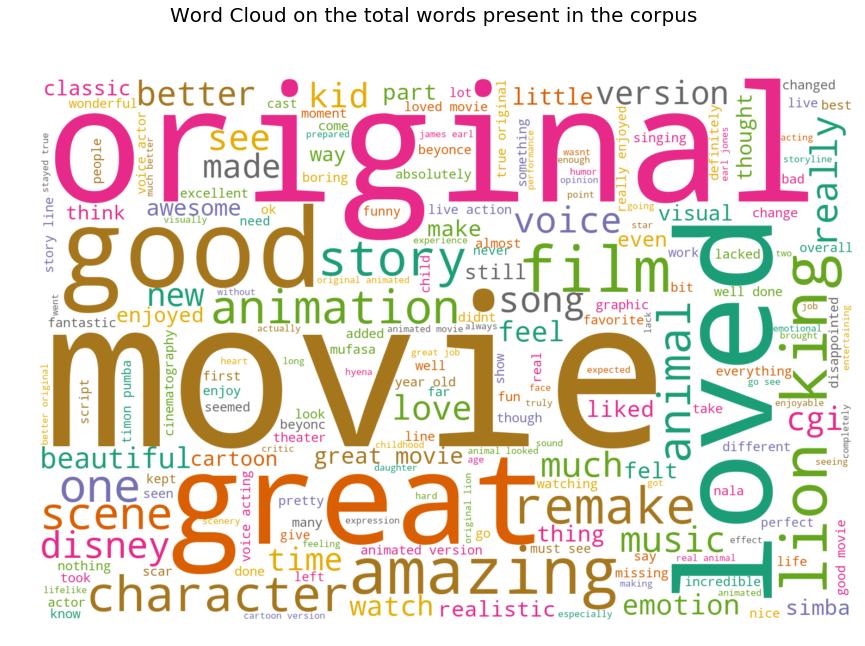

In [113]:
wordcloud = WordCloud(width=1500, height=1000, random_state=21,
                      background_color ='white',min_font_size = 10).generate(' '.join(all_words))

plt.figure(figsize=(15,10))
plt.imshow(wordcloud.recolor(colormap='Dark2'), interpolation="bilinear")
plt.axis('off')
plt.suptitle('Word Cloud on the total words present in the corpus',**title_font)
plt.show()

### Observations
- We can observe some good words like 'Original', 'Loved', 'Great', 'Amazing' etc.
- These words indicate that the users are having positive experience after watching the film.

## Word Cloud on the positive reviews present in the corpus.

In [114]:
positive_words = unlist_words(data1.loc[data1['sentiment']== 1,'modified_review'])

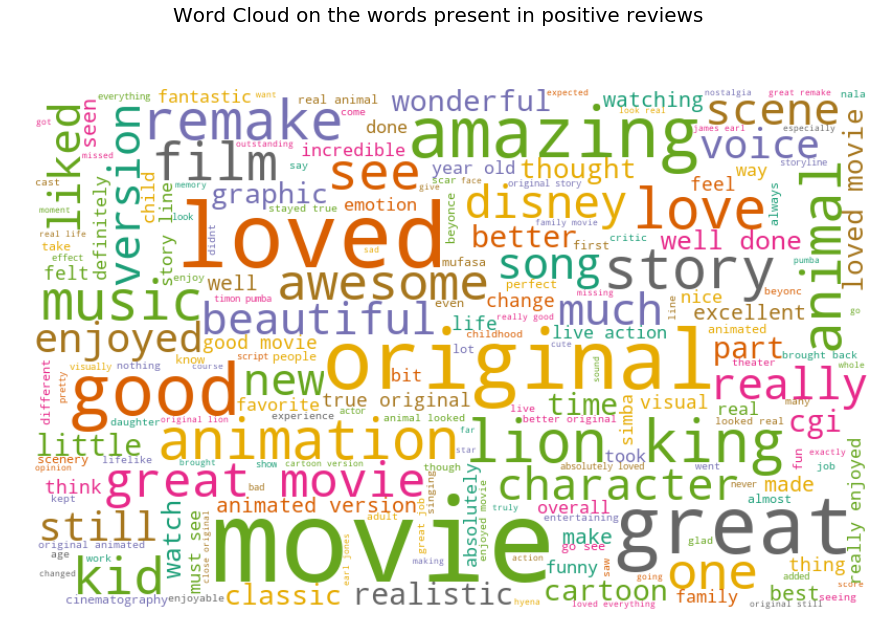

In [115]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='white').generate(' '.join(positive_words))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud.recolor(colormap='Dark2'), interpolation="bilinear")
plt.axis('off')
plt.suptitle('Word Cloud on the words present in positive reviews',**title_font)
plt.show()

### Observations
- We can observe some good words like 'Original', 'Loved', 'Great', 'Amazing' etc.
- These words indicate that the users are having positive experience after watching the film.

## Word Cloud on the negative reviews present in the corpus.

In [116]:
negative_words = unlist_words(data1.loc[data1['sentiment']== 0,'modified_review'])

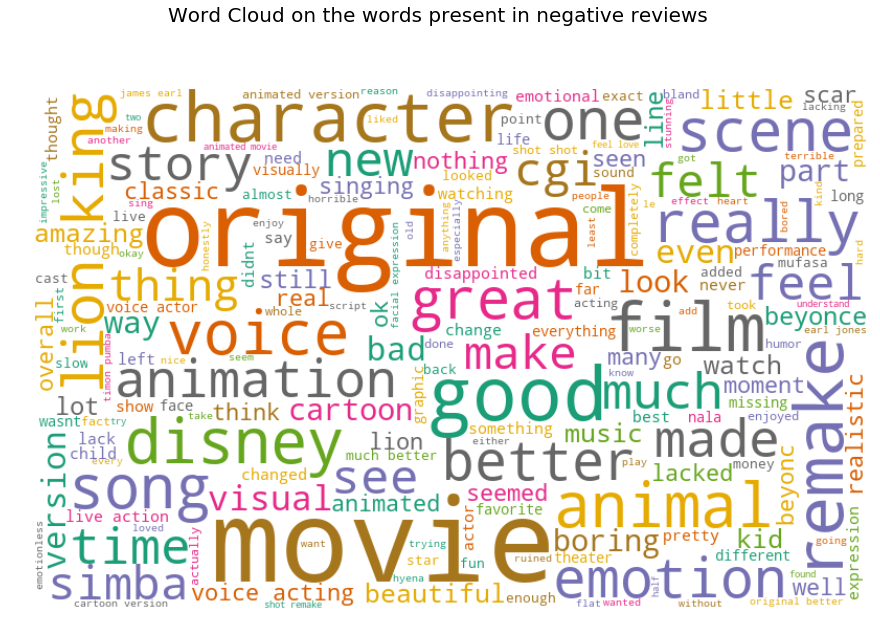

In [117]:
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110,background_color='white').generate(' '.join(negative_words))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud.recolor(colormap='Dark2'), interpolation="bilinear")
plt.axis('off')
plt.suptitle('Word Cloud on the words present in negative reviews',**title_font)
plt.show()

### Observations
- Even in the negative reviews We can observe some good words like 'Original', 'emotion'etc.
- We can see some negative words like 'Disappointed'.
- These words indicate that we should look more closely on the context in which these positive words are used in negative reviews.

## UNIGRAMS

## Checking the frequency distribution of words in positive and negative reviews.

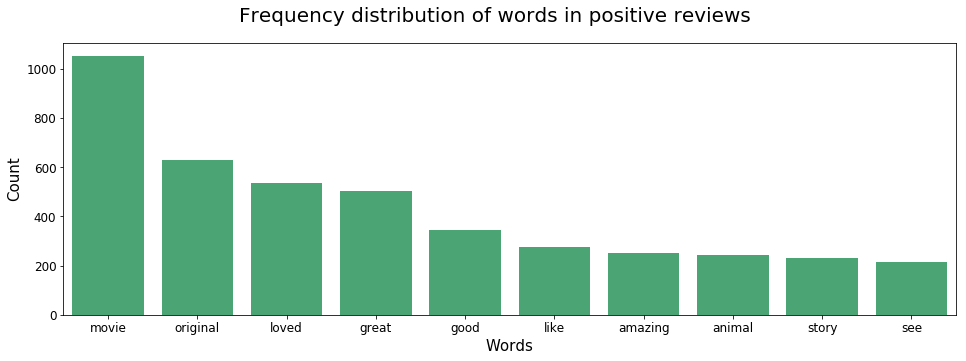

In [118]:
a = nltk.FreqDist(positive_words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
sns.barplot(data=d, x= "Word", y = "Count",color='mediumseagreen')
plt.suptitle('Frequency distribution of words in positive reviews',**title_font)
plt.xticks(fontsize=12,rotation=0,fontname='sans serif')
plt.xlabel('Words',**label_font)
plt.yticks(fontsize=12,fontname='sans serif')
plt.ylabel('Count',**label_font)
plt.show()

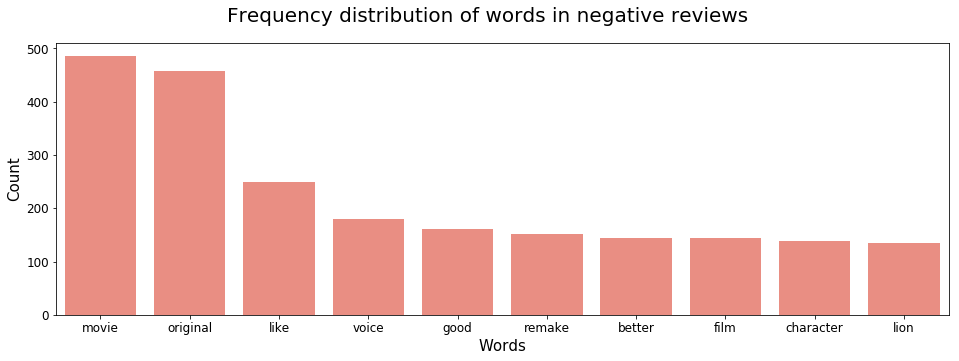

In [119]:
a = nltk.FreqDist(negative_words)
d = pd.DataFrame({'Word': list(a.keys()),
                  'Count': list(a.values())})
# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
sns.barplot(data=d, x= "Word", y = "Count",color='salmon')
plt.suptitle('Frequency distribution of words in negative reviews',**title_font)
plt.xticks(fontsize=12,rotation=0,fontname='sans serif')
plt.xlabel('Words',**label_font)
plt.yticks(fontsize=12,fontname='sans serif')
plt.ylabel('Count',**label_font)
plt.show()

In [120]:
data1.sample(2)

,ReviewID,Reviewer_Name,review,Rating,Date_of_Review,is_review_updated,hasProfanity,isVerified,isFrequentReviewer,realm,fav_genre1,fav_genre2,fav_genre3,sentiment,modified_review,number_of_sentences
2996,E99603CE-F11D-4BF2-9A75-4841BAFF8DA1,Purplebutterfly,"The music was wonderful, graphics terrific.",5.0,2019-08-02,1,False,True,False,Fandango,no_movie_rated,no_movie_rated,no_movie_rated,1,"[[music, wonderful, graphic, terrific]]",1
2632,EC99F3E7-0B60-4EAF-AEDD-A64E94B93520,Rod,"Great movie, but to many hyenas.",5.0,2019-08-03,0,False,True,False,Fandango,no_movie_rated,no_movie_rated,no_movie_rated,1,"[[great, movie, many, hyena]]",1


### Observations
- Unigrams fail to provide the actual context in which these words are used in the reviews.
- Bigrams and Trigrams will be more helpful.

## Ngrams

In [121]:
# Function to plot the required Ngram on required words.
def plot_ngram(CollocationFinder,words,title,ngrams,color,n):
    a = CollocationFinder.from_words(words).ngram_fd
    d = pd.DataFrame({ngrams: list(a.keys()),
                  'Count': list(a.values())})
    
    # selecting top n most frequent hashtags     
    d = d.nlargest(columns="Count", n = n) 
    plt.figure(figsize=(20,6))
    sns.barplot(data=d, x= ngrams, y = "Count",color=color)
    plt.suptitle(title,**title_font)
    plt.xticks(fontsize=14,rotation=35,fontname='sans serif')
    plt.xlabel(ngrams,**label_font)
    plt.yticks(fontsize=12,fontname='sans serif')
    plt.ylabel('Count',**label_font)
    plt.show()

### Bigrams on Positive and Negative reviews

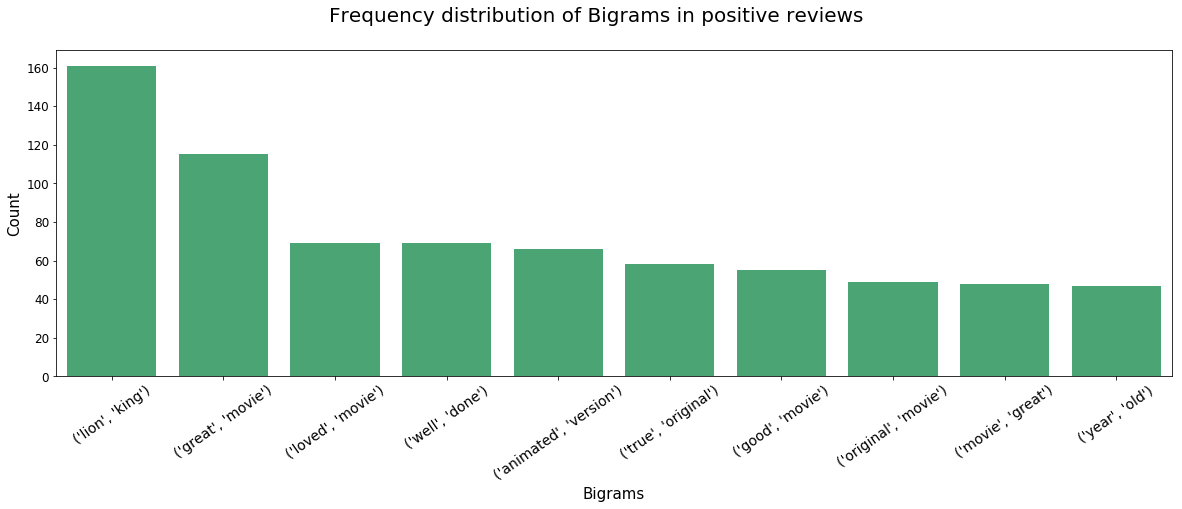

In [122]:
plot_ngram(BigramCollocationFinder,
positive_words,
           'Frequency distribution of Bigrams in positive reviews',
           'Bigrams',
           'mediumseagreen',10)

### Observations
- We can observe some meaningful bigrams like (great movie), (well done), (True original) etc.
- We can see a bigram (year old) it could indicate that the movie is loved by kids. (8 year olds) (4 year olds) etc.

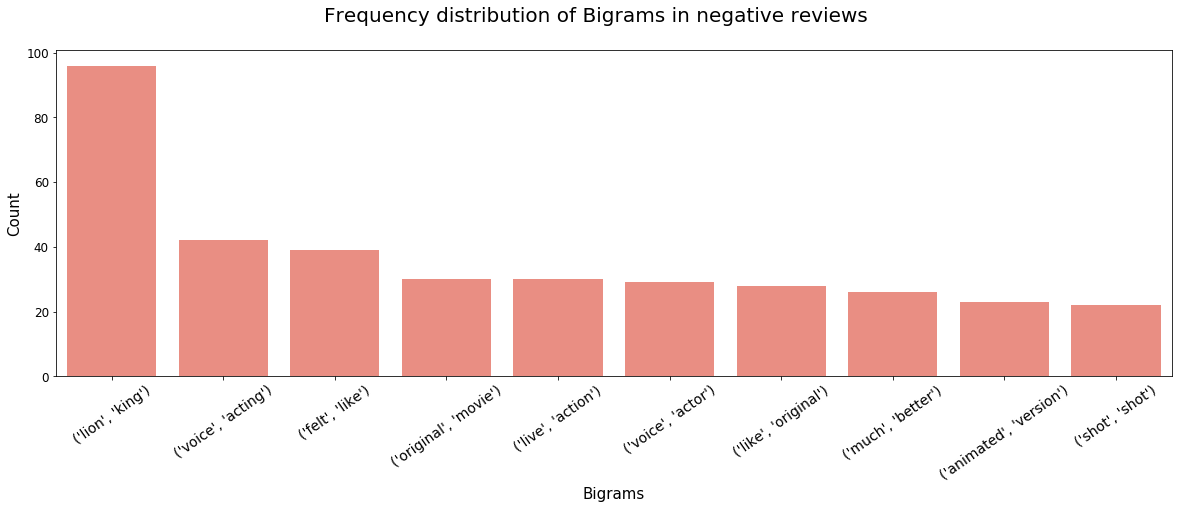

In [123]:
plot_ngram(BigramCollocationFinder,
negative_words,
           'Frequency distribution of Bigrams in negative reviews',
           'Bigrams',
           'salmon',10)

### Observations
- We can observe some bigrams that are used in negative context.
    - (voice,acting) - Some users did not like the voices and acting.
    - (original,movie) - Some users felt that original movie was better.
    - (voice,actor) - Some users felt that the voice actors could be better.
    - (live,action) - Some users didnt like the live action version.

### Trigrams on positive and negative reviews

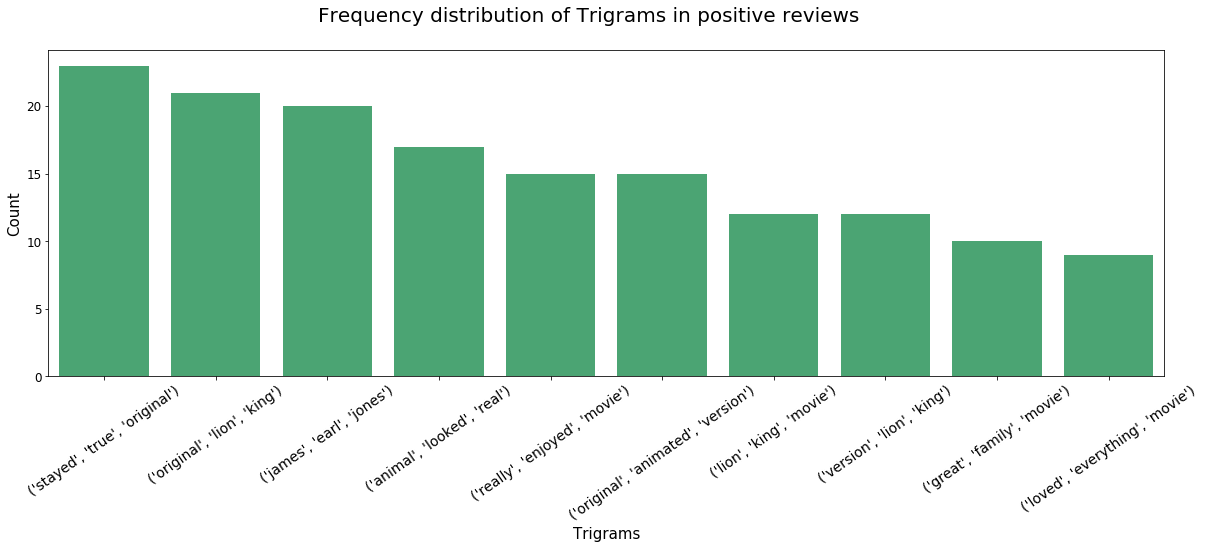

In [124]:
plot_ngram(TrigramCollocationFinder,
positive_words,
           'Frequency distribution of Trigrams in positive reviews',
           'Trigrams',
           'mediumseagreen',10)

### Observations
- We can observe some bigrams that are used in positive context.
    - (stayed,true,original) - Some users like how the movie stayed true to the original story.
    - (james,earl,jones) - Some users loved the voice of james earl who played musafa.
    - (animals,looked,real) - Some users felt that animals were real. i.e. they liked the live action.
    - (great,family,movie) - This movies is a great family movie to wacth with friends and family.

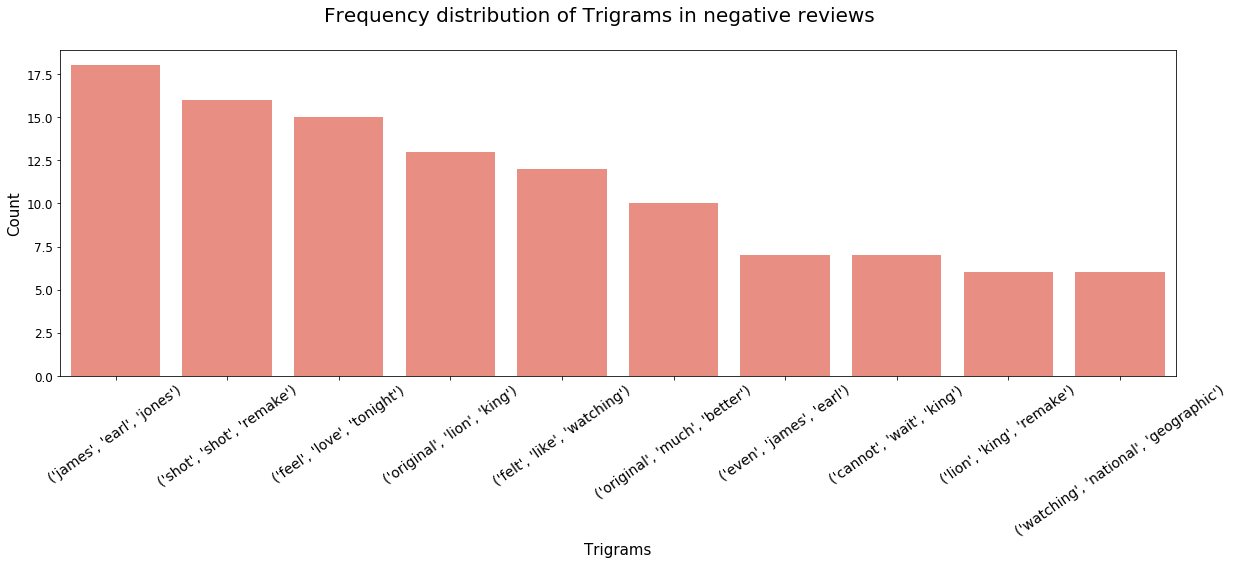

In [125]:
plot_ngram(TrigramCollocationFinder,
negative_words,
           'Frequency distribution of Trigrams in negative reviews',
           'Trigrams',
           'salmon',10)

### Observations
- We can observe some trigrams that are used in negative context.
    - (shot,shot,remake) - Some users expected the movie to add some different elements rather than copying the old one.
    - (james,earl,jones) - Some users felt that the voice of james earl was the only good thing in the movie.
    - (feel,love,tonight) - Some users didnt like this song.

### Bigrams and Trigrams on reviews given by medium scorers (Rating:2.5 and 3)

In [126]:
medium_scorers_words = unlist_words(data1.iloc[medium_scorers_ids]['modified_review'])

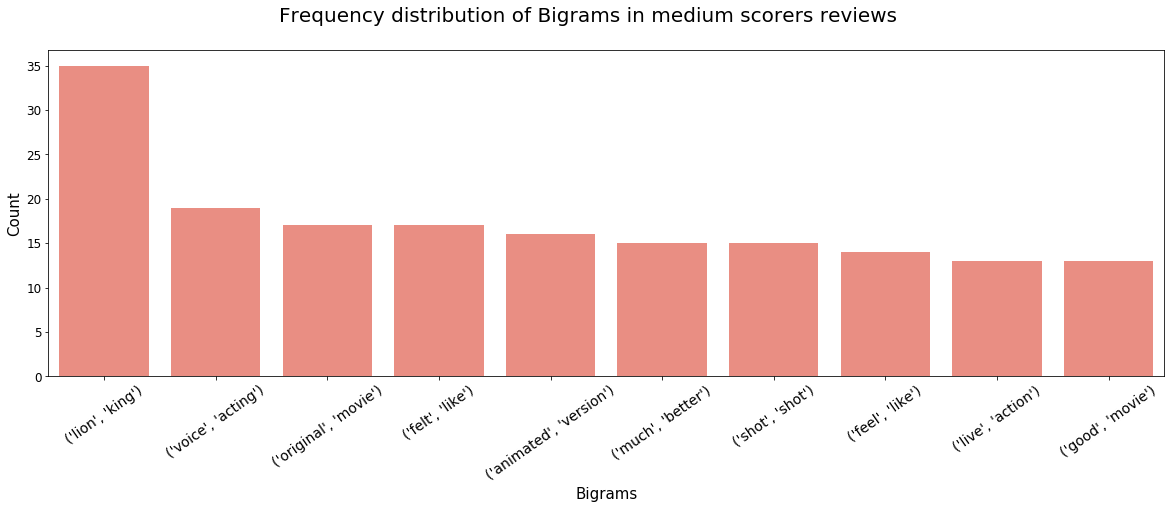

In [127]:
plot_ngram(BigramCollocationFinder,
medium_scorers_words,
           'Frequency distribution of Bigrams in medium scorers reviews',
           'Bigrams',
           'salmon',10)

### Observations
- We can observe some bigrams that are used in negative context.
    - (voice,acting) - Some users would have given better rating if the voices and acting was improved.
    - (animated,version) - Some like the animated version much better than live action.
    - (shot,shot) - Some didnt like how this film was the exact remake of original film.

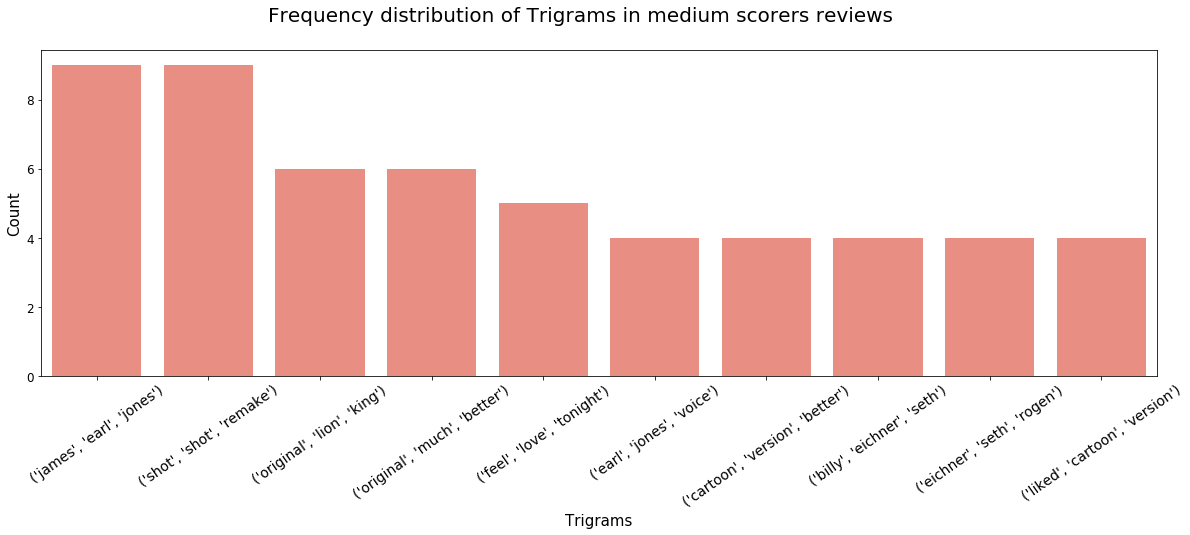

In [128]:
plot_ngram(TrigramCollocationFinder,
medium_scorers_words,
           'Frequency distribution of Trigrams in medium scorers reviews',
           'Trigrams',
           'salmon',10)

### Observations
- We can observe some trigrams that are used in negative context.
    - (original,much,better) - Some like the animated version much better than live action.
    - (james,earl,jones) - Some users loved the voice of james earl who played musafa and feel that it is the only best thing the movie
    - (eichner,seth,rogen) - Some users didnt like the voices of eichner and seth rogen as timon and pumba.

### Bigrams and Trigrams on negative reviews given by verified users

In [129]:
verified_neg_review__words = unlist_words(data1.iloc[verified_neg_review_ids]['modified_review'])

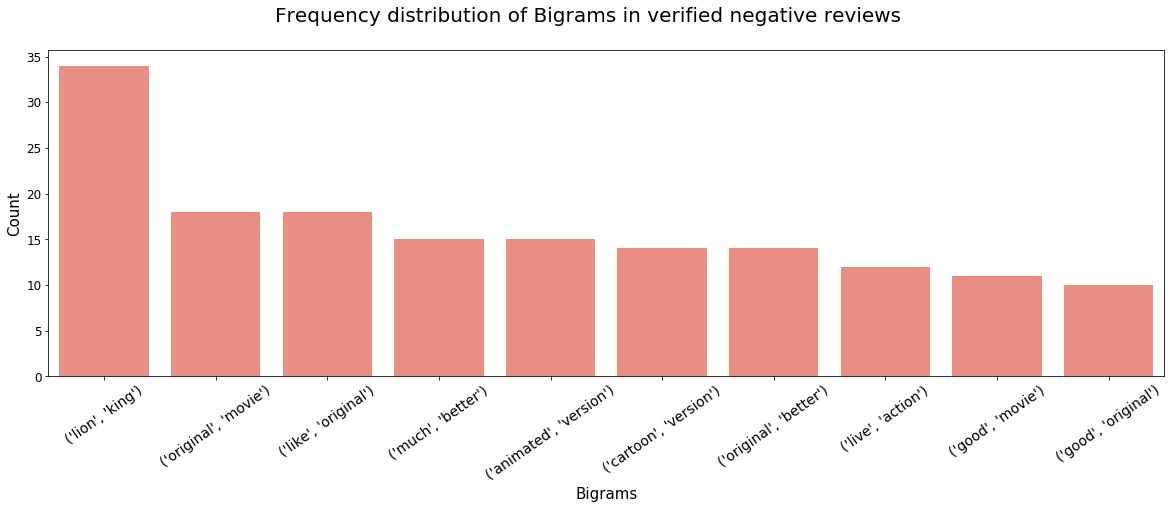

In [130]:
plot_ngram(BigramCollocationFinder,
verified_neg_review__words,
           'Frequency distribution of Bigrams in verified negative reviews',
           'Bigrams',
           'salmon',10)

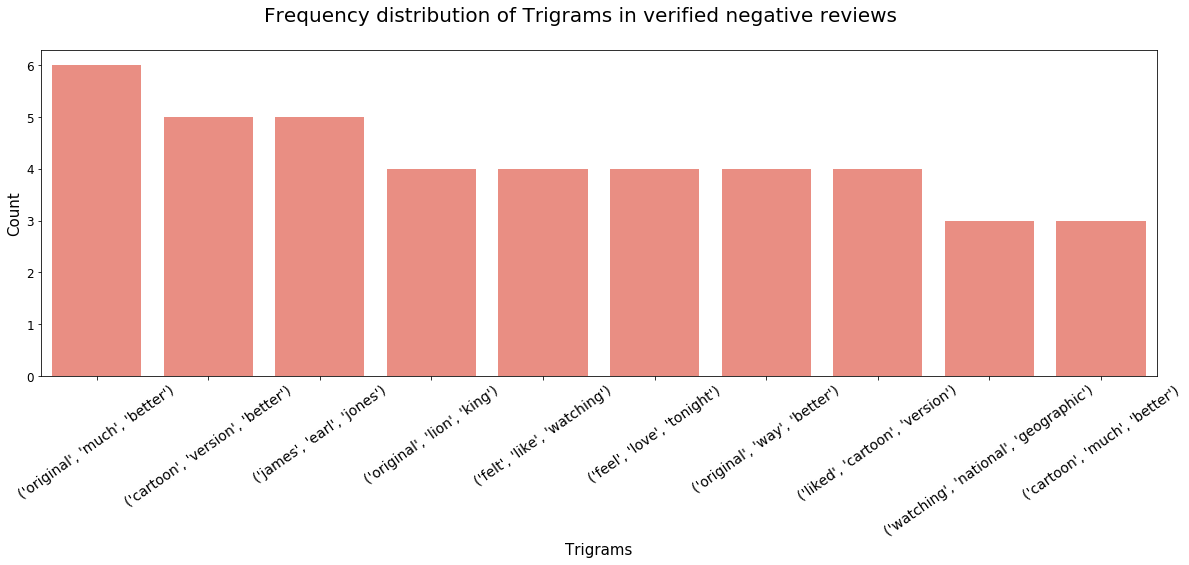

In [131]:
plot_ngram(TrigramCollocationFinder,
verified_neg_review__words,
           'Frequency distribution of Trigrams in verified negative reviews',
           'Trigrams',
           'salmon',10)

### Bigrams and Trigrams of reviews given by users whose first, second or third favourite genre is same as Lion King.

In [132]:
fav_genre1_review_positive_words = unlist_words(data1.loc[((data1.fav_genre1=='Action & Adventure')|
                                            (data1.fav_genre1=='Animation')|
                                            (data1.fav_genre1=='Drama'))&(data1.sentiment == 1),
                                            ('modified_review')])
fav_genre1_review_negative_words = unlist_words(data1.loc[((data1.fav_genre1=='Action & Adventure')|
                                            (data1.fav_genre1=='Animation')|
                                            (data1.fav_genre1=='Drama'))&(data1.sentiment == 0),
                                            ('modified_review')])

fav_genre2_review_positive_words = unlist_words(data1.loc[((data1.fav_genre2=='Action & Adventure')|
                                            (data1.fav_genre2=='Animation')|
                                            (data1.fav_genre2=='Drama'))&(data1.sentiment == 1),
                                            ('modified_review')])
fav_genre2_review_negative_words = unlist_words(data1.loc[((data1.fav_genre2=='Action & Adventure')|
                                            (data1.fav_genre2=='Animation')|
                                            (data1.fav_genre2=='Drama'))&(data1.sentiment == 0),
                                            ('modified_review')])

fav_genre3_review_positive_words = unlist_words(data1.loc[((data1.fav_genre3=='Action & Adventure')|
                                            (data1.fav_genre3=='Animation')|
                                            (data1.fav_genre3=='Drama'))&(data1.sentiment == 1),
                                            ('modified_review')])
fav_genre3_review_negative_words = unlist_words(data1.loc[((data1.fav_genre3=='Action & Adventure')|
                                            (data1.fav_genre3=='Animation')|
                                            (data1.fav_genre3=='Drama'))&(data1.sentiment == 0),
                                            ('modified_review')])

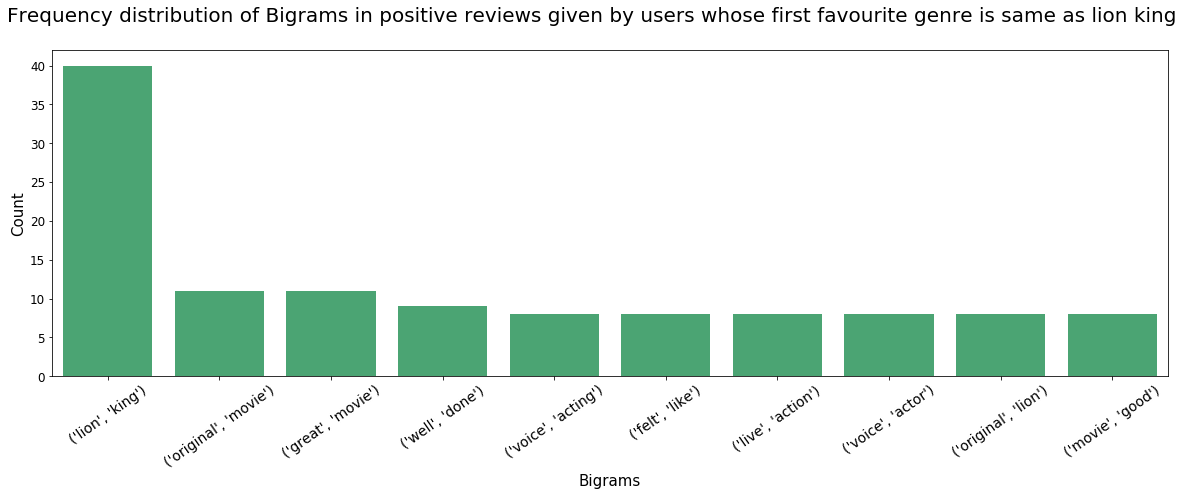

In [133]:
plot_ngram(BigramCollocationFinder,
fav_genre1_review_positive_words,
           'Frequency distribution of Bigrams in positive reviews given by users whose first favourite genre is same as lion king',
           'Bigrams',
           'mediumseagreen',10)

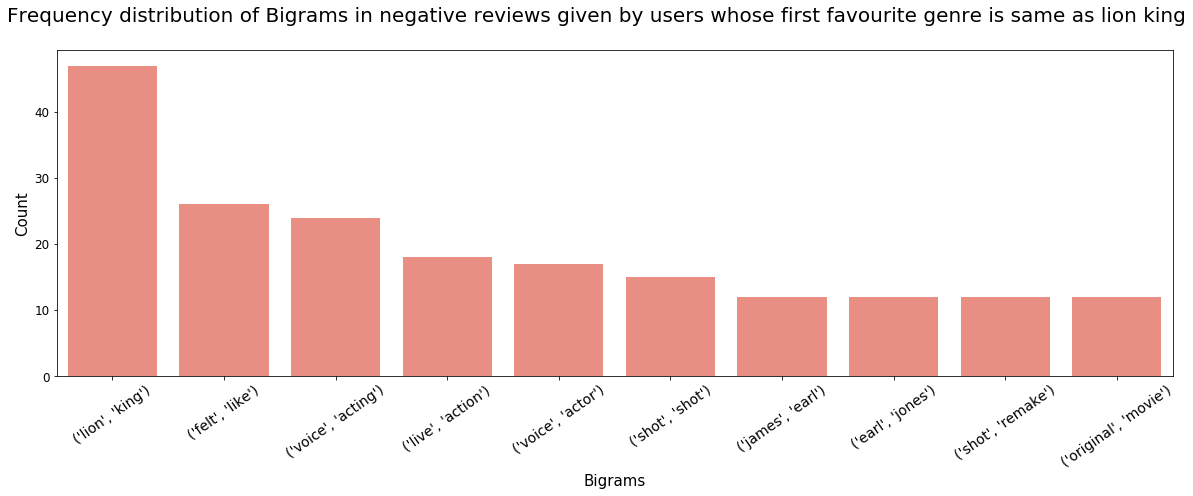

In [134]:
plot_ngram(BigramCollocationFinder,
fav_genre1_review_negative_words,
           'Frequency distribution of Bigrams in negative reviews given by users whose first favourite genre is same as lion king',
           'Bigrams',
           'salmon',10)

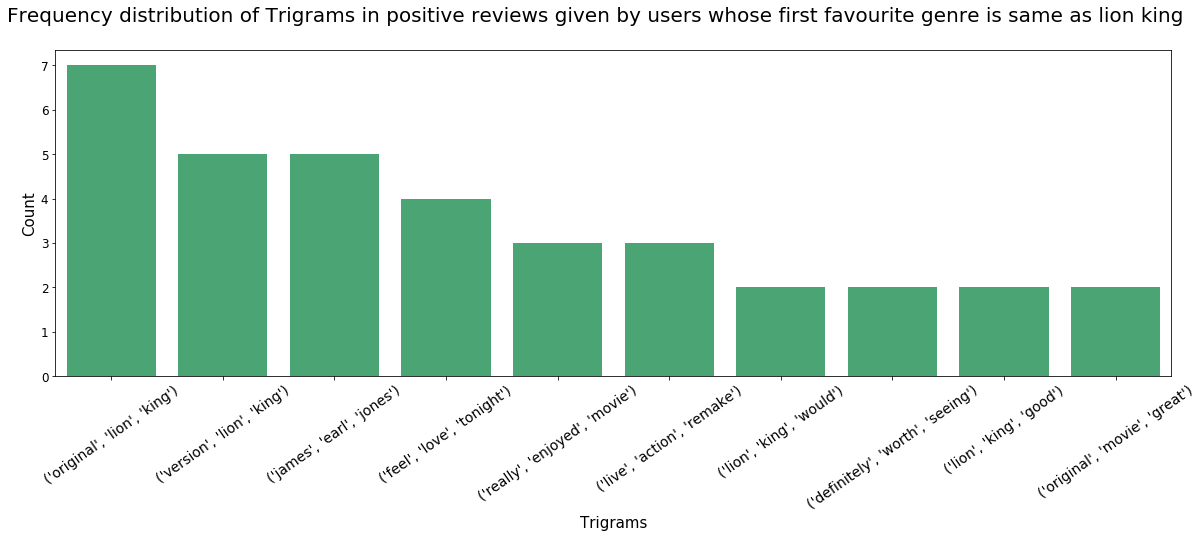

In [135]:
plot_ngram(TrigramCollocationFinder,
fav_genre1_review_positive_words,
           'Frequency distribution of Trigrams in positive reviews given by users whose first favourite genre is same as lion king',
           'Trigrams',
           'mediumseagreen',10)

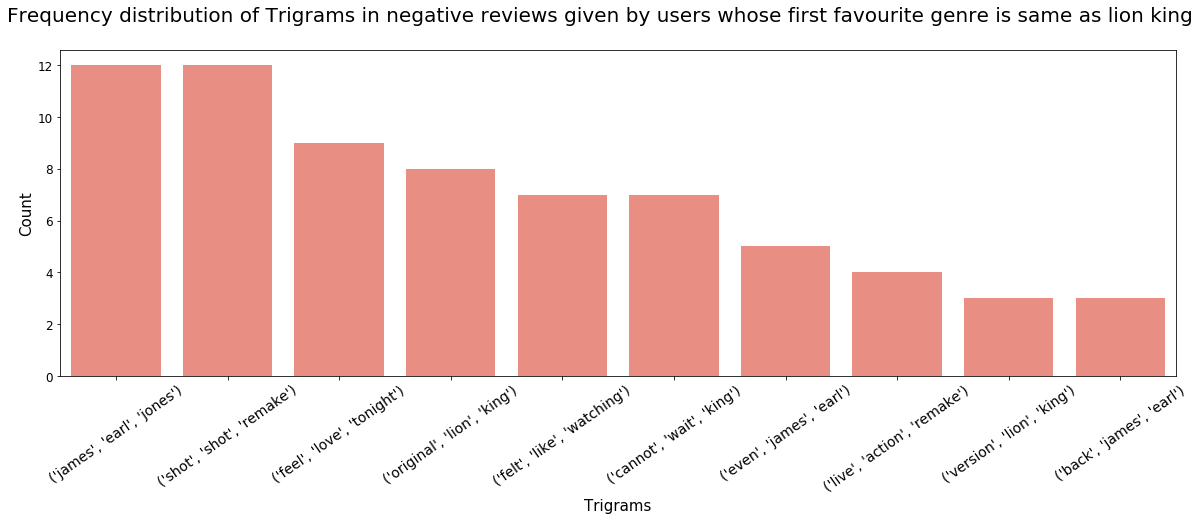

In [136]:
plot_ngram(TrigramCollocationFinder,
fav_genre1_review_negative_words,
           'Frequency distribution of Trigrams in negative reviews given by users whose first favourite genre is same as lion king',
           'Trigrams',
           'salmon',10)

#### Second Favourite genre is same as Lion King

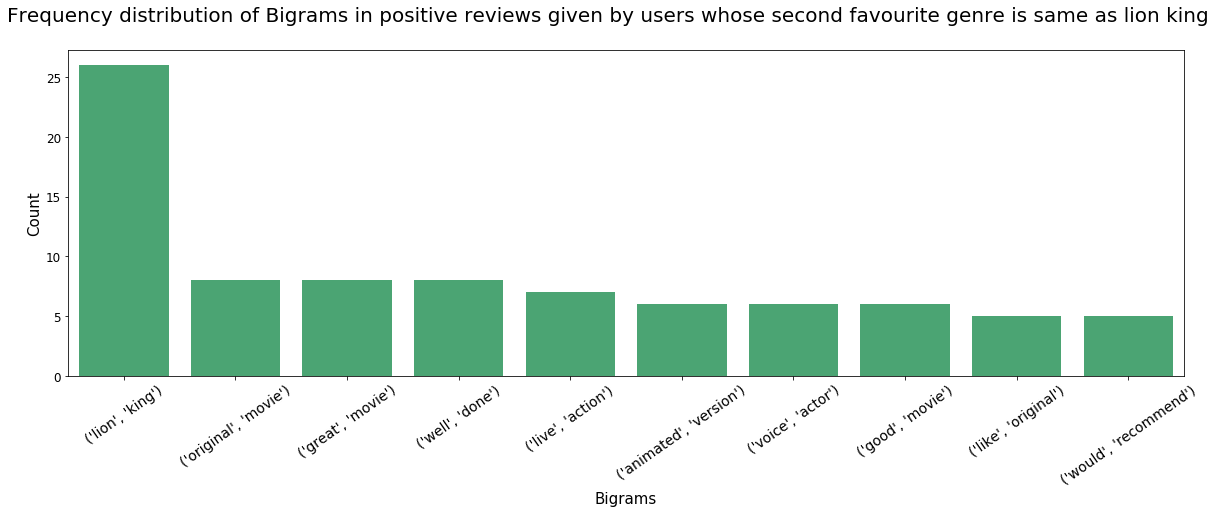

In [137]:
plot_ngram(BigramCollocationFinder,
fav_genre2_review_positive_words,
           'Frequency distribution of Bigrams in positive reviews given by users whose second favourite genre is same as lion king',
           'Bigrams',
           'mediumseagreen',10)

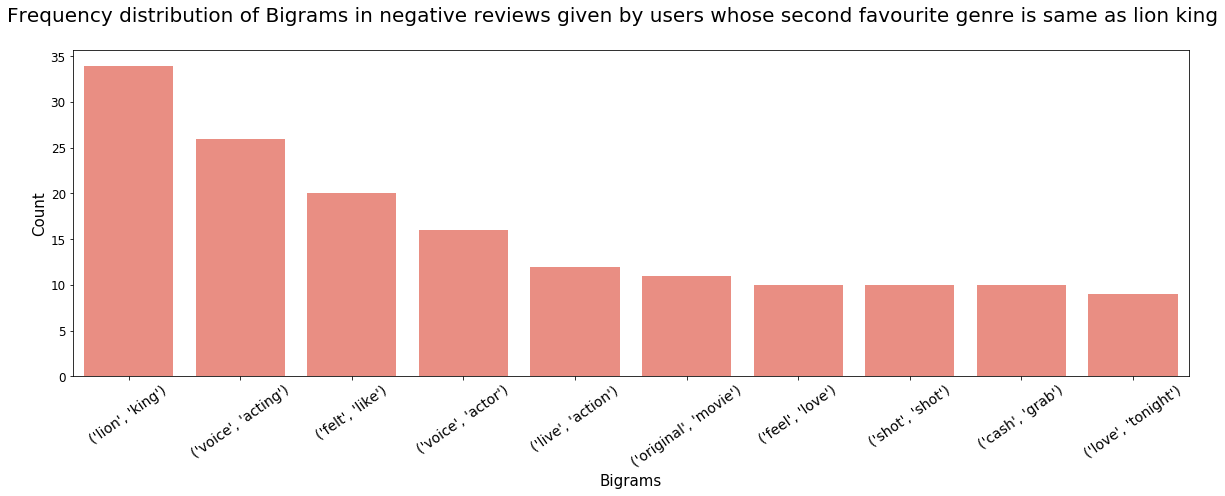

In [138]:
plot_ngram(BigramCollocationFinder,
fav_genre2_review_negative_words,
           'Frequency distribution of Bigrams in negative reviews given by users whose second favourite genre is same as lion king',
           'Bigrams',
           'salmon',10)

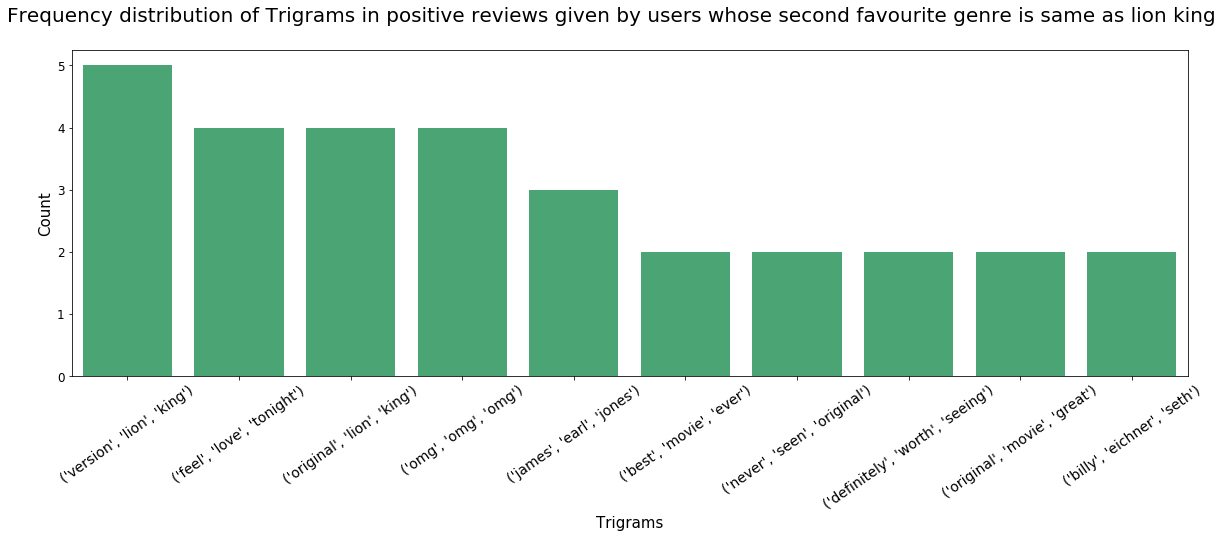

In [139]:
plot_ngram(TrigramCollocationFinder,
fav_genre2_review_positive_words,
           'Frequency distribution of Trigrams in positive reviews given by users whose second favourite genre is same as lion king',
           'Trigrams',
           'mediumseagreen',10)

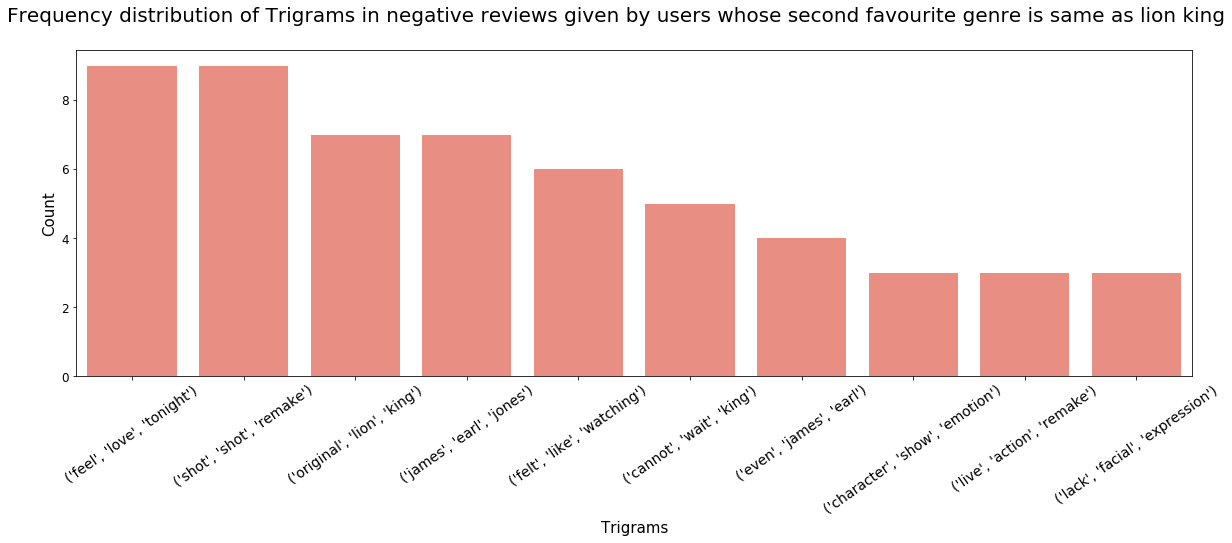

In [140]:
plot_ngram(TrigramCollocationFinder,
fav_genre2_review_negative_words,
           'Frequency distribution of Trigrams in negative reviews given by users whose second favourite genre is same as lion king',
           'Trigrams',
           'salmon',10)

### Observations
- (lack,facial,expressions) - Some users felt that the facial expressions of the animals could be improved.

#### Third Favourite genre is same as Lion King

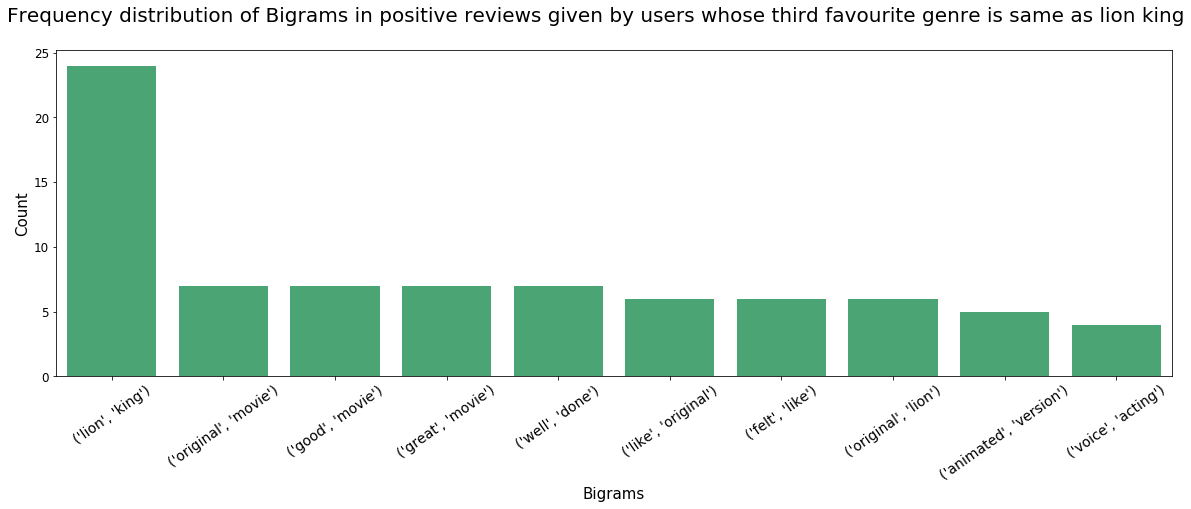

In [141]:
plot_ngram(BigramCollocationFinder,
fav_genre3_review_positive_words,
           'Frequency distribution of Bigrams in positive reviews given by users whose third favourite genre is same as lion king',
           'Bigrams',
           'mediumseagreen',10)

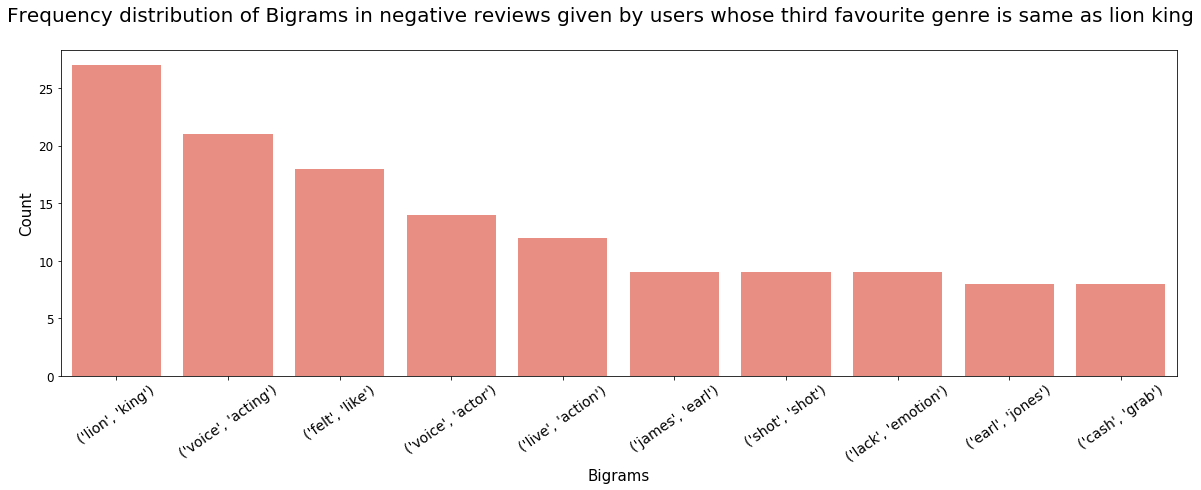

In [142]:
plot_ngram(BigramCollocationFinder,
fav_genre3_review_negative_words,
           'Frequency distribution of Bigrams in negative reviews given by users whose third favourite genre is same as lion king',
           'Bigrams',
           'salmon',10)

### Observations
- (lack,emotion) - Users felt that the animals lack emotion.
- (cash,grab) - Users felt that this movie remade to make money.

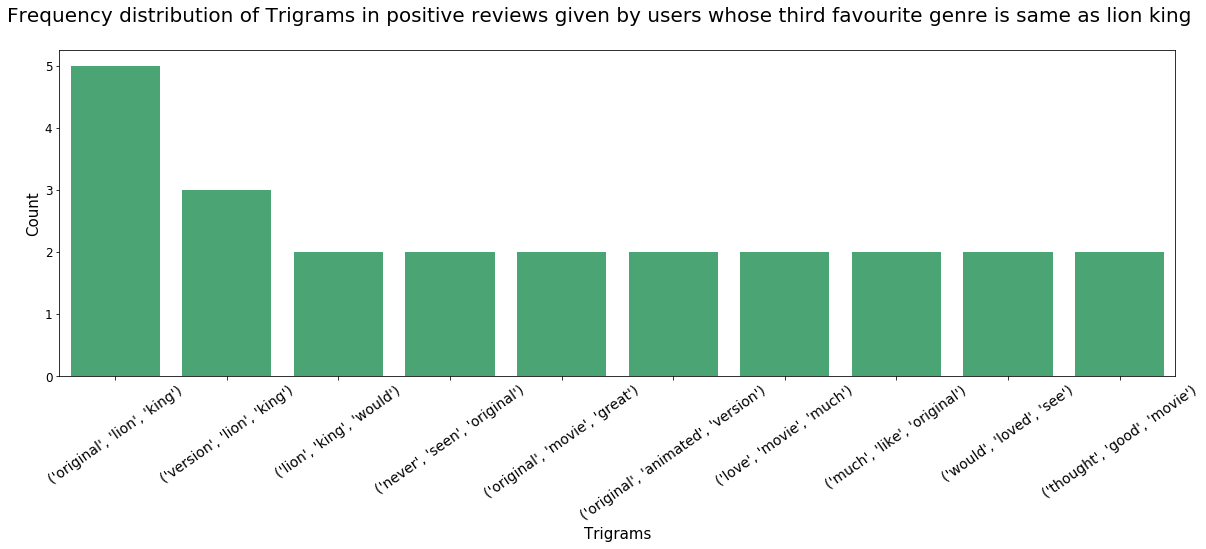

In [143]:
plot_ngram(TrigramCollocationFinder,
fav_genre3_review_positive_words,
           'Frequency distribution of Trigrams in positive reviews given by users whose third favourite genre is same as lion king',
           'Trigrams',
           'mediumseagreen',10)

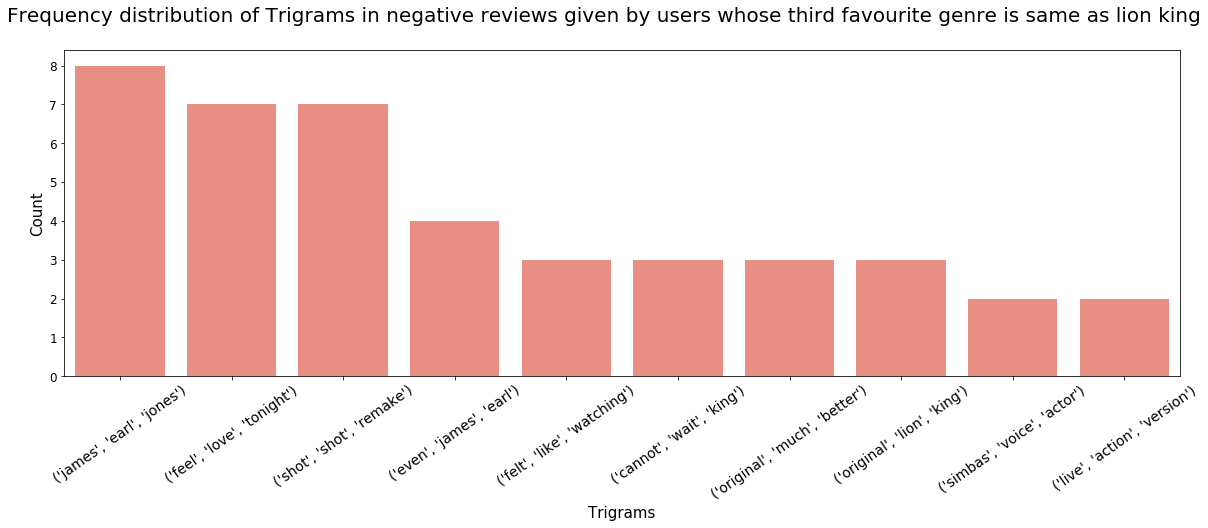

In [144]:
plot_ngram(TrigramCollocationFinder,
fav_genre3_review_negative_words,
           'Frequency distribution of Trigrams in negative reviews given by users whose third favourite genre is same as lion king',
           'Trigrams',
           'salmon',10)

In [145]:
data1.sample()

,ReviewID,Reviewer_Name,review,Rating,Date_of_Review,is_review_updated,hasProfanity,isVerified,isFrequentReviewer,realm,fav_genre1,fav_genre2,fav_genre3,sentiment,modified_review,number_of_sentences
1760,90bd5072-461c-4468-be13-a3f0a582d8ac,Ellis,Surprisingly Not as good as the original. Was missing something to me. Beautiful though. Well done animation and good casting.,3.0,2019-08-06,0,False,True,False,Fandango,no_movie_rated,no_movie_rated,no_movie_rated,0,"[[surprisingly, good, original], [missing, something], [beautiful, though], [well, done, animation, good, casting]]",4


In [146]:
def get_grams(CollocationFinder,words,ngrams,n):
    a = CollocationFinder.from_words(words).ngram_fd
    d = pd.DataFrame({ngrams: list(a.keys()),
                  'Count': list(a.values())},)
    
    # selecting top n most frequent hashtags     
    d = d.nlargest(columns="Count", n = n)
    d = d[ngrams].values
    col = ngrams
    return(d,col)

In [147]:
p1,col1 = get_grams(BigramCollocationFinder,positive_words,'Bigrams_positive_words',20)
p2,col2 = get_grams(TrigramCollocationFinder,positive_words,'Trigrams_positive_words',20)
p3,col3 = get_grams(BigramCollocationFinder,fav_genre1_review_positive_words,'Bigrams_fav_genre1',20)
p4,col4 = get_grams(TrigramCollocationFinder,fav_genre1_review_positive_words,'Trigrams_fav_genre1',20)
p5,col5 = get_grams(BigramCollocationFinder,fav_genre2_review_positive_words,'Bigrams_fav_genre2',20)
p6,col6 = get_grams(TrigramCollocationFinder,fav_genre2_review_positive_words,'Trigrams_fav_genre2',20)
p7,col7 = get_grams(BigramCollocationFinder,fav_genre3_review_positive_words,'Bigrams_fav_genre3',20)
p8,col8 = get_grams(TrigramCollocationFinder,fav_genre3_review_positive_words,'Trigrams_fav_genre3',20)

In [148]:
Positve_ngrams = pd.DataFrame([p1,p2,p3,p4,p5,p6,p7,p8],index=[col1,col2,col3,col4,col5,col6,col7,col8]).T

## Comparision of all ngrams in positive reviews.

In [149]:
Positve_ngrams

,Bigrams_positive_words,Trigrams_positive_words,Bigrams_fav_genre1,Trigrams_fav_genre1,Bigrams_fav_genre2,Trigrams_fav_genre2,Bigrams_fav_genre3,Trigrams_fav_genre3
0,"(lion, king)","(stayed, true, original)","(lion, king)","(original, lion, king)","(lion, king)","(version, lion, king)","(lion, king)","(original, lion, king)"
1,"(great, movie)","(original, lion, king)","(original, movie)","(version, lion, king)","(original, movie)","(feel, love, tonight)","(original, movie)","(version, lion, king)"
2,"(loved, movie)","(james, earl, jones)","(great, movie)","(james, earl, jones)","(great, movie)","(original, lion, king)","(good, movie)","(lion, king, would)"
3,"(well, done)","(animal, looked, real)","(well, done)","(feel, love, tonight)","(well, done)","(omg, omg, omg)","(great, movie)","(never, seen, original)"
4,"(animated, version)","(really, enjoyed, movie)","(voice, acting)","(really, enjoyed, movie)","(live, action)","(james, earl, jones)","(well, done)","(original, movie, great)"
5,"(true, original)","(original, animated, version)","(felt, like)","(live, action, remake)","(animated, version)","(best, movie, ever)","(like, original)","(original, animated, version)"
6,"(good, movie)","(lion, king, movie)","(live, action)","(lion, king, would)","(voice, actor)","(never, seen, original)","(felt, like)","(love, movie, much)"
7,"(original, movie)","(version, lion, king)","(voice, actor)","(definitely, worth, seeing)","(good, movie)","(definitely, worth, seeing)","(original, lion)","(much, like, original)"
8,"(movie, great)","(great, family, movie)","(original, lion)","(lion, king, good)","(like, original)","(original, movie, great)","(animated, version)","(would, loved, see)"
9,"(year, old)","(loved, everything, movie)","(movie, good)","(original, movie, great)","(would, recommend)","(billy, eichner, seth)","(voice, acting)","(thought, good, movie)"


In [150]:
n1,col1 = get_grams(BigramCollocationFinder,negative_words,'Bigrams_negative_words',20)
n2,col2 = get_grams(TrigramCollocationFinder,negative_words,'Trigrams_negative_words',20)
n3,col3 = get_grams(BigramCollocationFinder,fav_genre1_review_negative_words,'Bigrams_fav_genre1',20)
n4,col4 = get_grams(TrigramCollocationFinder,fav_genre1_review_negative_words,'Trigrams_fav_genre1',20)
n5,col5 = get_grams(BigramCollocationFinder,fav_genre2_review_negative_words,'Bigrams_fav_genre2',20)
n6,col6 = get_grams(TrigramCollocationFinder,fav_genre2_review_negative_words,'Trigrams_fav_genre2',20)
n7,col7 = get_grams(BigramCollocationFinder,fav_genre3_review_negative_words,'Bigrams_fav_genre3',20)
n8,col8 = get_grams(TrigramCollocationFinder,fav_genre3_review_negative_words,'Trigrams_fav_genre3',20)

In [151]:
negative_ngrams = pd.DataFrame([n1,n2,n3,n4,n5,n6,n7,n8],index=[col1,col2,col3,col4,col5,col6,col7,col8]).T

## Comparision of all ngrams in negative reviews.

In [152]:
negative_ngrams

,Bigrams_negative_words,Trigrams_negative_words,Bigrams_fav_genre1,Trigrams_fav_genre1,Bigrams_fav_genre2,Trigrams_fav_genre2,Bigrams_fav_genre3,Trigrams_fav_genre3
0,"(lion, king)","(james, earl, jones)","(lion, king)","(james, earl, jones)","(lion, king)","(feel, love, tonight)","(lion, king)","(james, earl, jones)"
1,"(voice, acting)","(shot, shot, remake)","(felt, like)","(shot, shot, remake)","(voice, acting)","(shot, shot, remake)","(voice, acting)","(feel, love, tonight)"
2,"(felt, like)","(feel, love, tonight)","(voice, acting)","(feel, love, tonight)","(felt, like)","(original, lion, king)","(felt, like)","(shot, shot, remake)"
3,"(original, movie)","(original, lion, king)","(live, action)","(original, lion, king)","(voice, actor)","(james, earl, jones)","(voice, actor)","(even, james, earl)"
4,"(live, action)","(felt, like, watching)","(voice, actor)","(felt, like, watching)","(live, action)","(felt, like, watching)","(live, action)","(felt, like, watching)"
5,"(voice, actor)","(original, much, better)","(shot, shot)","(cannot, wait, king)","(original, movie)","(cannot, wait, king)","(james, earl)","(cannot, wait, king)"
6,"(like, original)","(even, james, earl)","(james, earl)","(even, james, earl)","(feel, love)","(even, james, earl)","(shot, shot)","(original, much, better)"
7,"(much, better)","(cannot, wait, king)","(earl, jones)","(live, action, remake)","(shot, shot)","(character, show, emotion)","(lack, emotion)","(original, lion, king)"
8,"(animated, version)","(lion, king, remake)","(shot, remake)","(version, lion, king)","(cash, grab)","(live, action, remake)","(earl, jones)","(simbas, voice, actor)"
9,"(shot, shot)","(watching, national, geographic)","(original, movie)","(back, james, earl)","(love, tonight)","(lack, facial, expression)","(cash, grab)","(live, action, version)"


In [153]:
m1,col1 = get_grams(BigramCollocationFinder,medium_scorers_words,'Bigrams_medium_scorers_words',20)
m2,col2 = get_grams(TrigramCollocationFinder,medium_scorers_words,'Trigrams_medium_scorers_words',20)
m3,col3 = get_grams(BigramCollocationFinder,verified_neg_review__words,'Bigrams_verified negative_reviews',20)
m4,col4 = get_grams(TrigramCollocationFinder,verified_neg_review__words,'Trigrams_verified negative_reviews',20)

In [154]:
special_ngrams = pd.DataFrame([m1,m2,m3,m4],index=[col1,col2,col3,col4]).T

## Comparision of all ngrams in reviews of medium scorers and verified reviews.

In [155]:
special_ngrams

,Bigrams_medium_scorers_words,Trigrams_medium_scorers_words,Bigrams_verified negative_reviews,Trigrams_verified negative_reviews
0,"(lion, king)","(james, earl, jones)","(lion, king)","(original, much, better)"
1,"(voice, acting)","(shot, shot, remake)","(original, movie)","(cartoon, version, better)"
2,"(original, movie)","(original, lion, king)","(like, original)","(james, earl, jones)"
3,"(felt, like)","(original, much, better)","(much, better)","(original, lion, king)"
4,"(animated, version)","(feel, love, tonight)","(animated, version)","(felt, like, watching)"
5,"(much, better)","(earl, jones, voice)","(cartoon, version)","(feel, love, tonight)"
6,"(shot, shot)","(cartoon, version, better)","(original, better)","(original, way, better)"
7,"(feel, like)","(billy, eichner, seth)","(live, action)","(liked, cartoon, version)"
8,"(live, action)","(eichner, seth, rogen)","(good, movie)","(watching, national, geographic)"
9,"(good, movie)","(liked, cartoon, version)","(good, original)","(cartoon, much, better)"


## Comparing polarity and rating.

In [156]:
from textblob import TextBlob

In [157]:
data1['polarity'] = data1['review'].map(lambda text: TextBlob(text).sentiment.polarity)

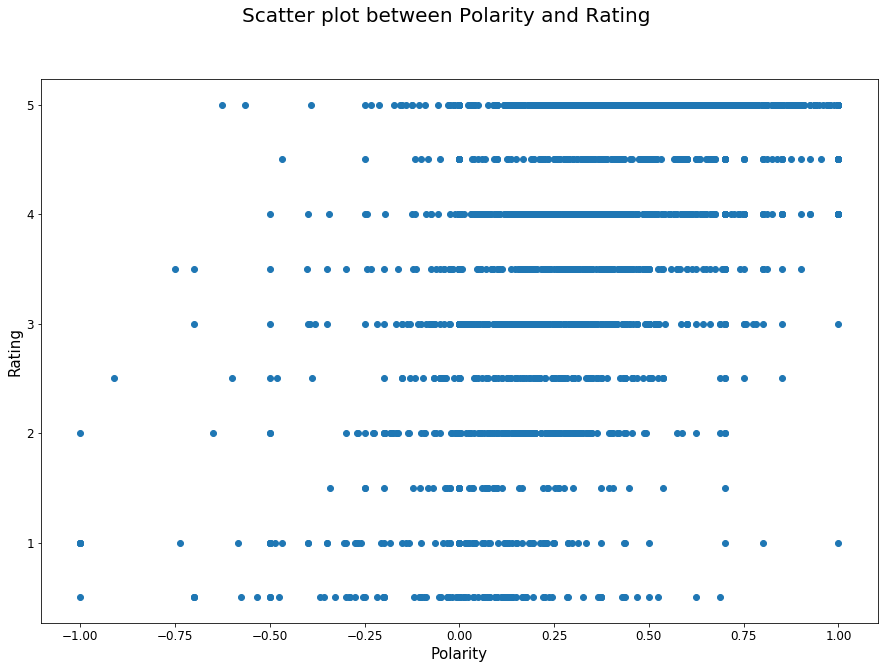

In [158]:
plt.figure(figsize=(15,10))
plt.scatter(data1['polarity'],data1['Rating'])
plt.suptitle('Scatter plot between Polarity and Rating',**title_font)
plt.xticks(fontsize=12,rotation=0,fontname='sans serif')
plt.xlabel('Polarity',**label_font)
plt.yticks(fontsize=12,fontname='sans serif')
plt.ylabel('Rating',**label_font)
plt.show()

## Observations
- We can find that when polarity increases then the rating of the movie is also increasing. This shows positive correlation.
- But there isn't a strong correlation between polarity and ratings.
- Reviews with strong positive polarity of 0.5 to 1 also gave a rating below 3 which implies negative sentiment.
- This shows that users have different rating patterns and reviews.
- Some write a really good review and give a rating of 2.5 or 3.

## Overall observations
- Overall the movie has a positive vibe in the user community.
- The strong point of the film is the live action. users felt that they were watching live animals. Kids loved the movie. 
- Many users liked how the story stayed true the original plot but few users expected this movie to add some extra scenes that were not present in the original. 
- Users loved the voice of musafa played by earl jones.
- Major negative element in the movie is the voices of the actors other than earl jones. They felt better actors could be selected to do the voice over.
- Another negative element in the movie was even though the live action was very realistic. Some characters like Scar, Timon and pumba lacked emotional expressions.
- As the movie has the exact plot of the original movie. Few users felt that it was remade to make money. Adding few extra scenes might have helped to win these audience.

## What could have been done to improve the ratings and reviews.
- Adding few extra scenes without damaging the original plot would have helped.
- Better facial expressions of animals would have helped to maintain emotional connect with the user.
- Better actors could be selected for dubbing.

In [159]:
#data1.to_csv('The_lion_king_reviews_eda_final.csv',index = False)

In [160]:
data1.sample()

,ReviewID,Reviewer_Name,review,Rating,Date_of_Review,is_review_updated,hasProfanity,isVerified,isFrequentReviewer,realm,fav_genre1,fav_genre2,fav_genre3,sentiment,modified_review,number_of_sentences,polarity
1310,F4BECDAB-F88C-484F-BA80-33183D78C52E,voxpopuli123,they kept it true tot he original with some minor changes. still loved it!,5.0,2019-08-08,0,False,True,False,Fandango,no_movie_rated,no_movie_rated,no_movie_rated,1,"[[kept, true, tot, original, minor, change], [still, loved]]",2,0.3875
